I just found out the abbreviation of "Pleistocene marine" and "Pleistocene moraine” are the same, pm. Hence, the models were trained by considering they are the same facies. I need to modify the scripts to redo the grid searching and model building. In the mean time, I'll modify the issues we had but choose to neglect.
1. Change the abbreviation and update the excelfile.
1. Rreplace factprizing in wasafacies.py by adopting the labels in the excel directly. This would solve the inconsistent facies factorization among different data representations.
1. Modify the sections in the sandflat which we discussed in `ML_element_16.ipynb`.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#plt.style.use('ggplot')
plt.style.use('seaborn-paper')
#mpl.rcParams['xtick.labelsize'] = 8
#mpl.rcParams["image.cmap"] = 'gray'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

# Issue with sandflat
I removed the confusing section N36-2 and add the sections VC13-2 1-120 // N49-3 14-97 // N50-2 36-145. I noticed the section depth of N50-2 is accumated after N50-1 during the scanning. This is why there is 26 cm addition comparing to the photo in Kernbeschreibung.

In [2]:
info_df = pd.read_csv('data/info.cleaned.all.csv', index_col=0, 
                      usecols=['composite_id', 'core_section', 'section_depth_mm'])

In [3]:
data_df = pd.read_csv('data/XRF_results.cleaned.all.csv', index_col=0, usecols=['composite_id', 'K'])

In [4]:
data_df = pd.concat([info_df, data_df], axis=1, join='inner')

In [6]:
data_df[data_df.core_section == 'N50-2']

,core_section,section_depth_mm,K
composite_id,,,
N50_00711,N50-2,258.0,2060
N50_00713,N50-2,260.0,1944
N50_00715,N50-2,262.0,2162
N50_00717,N50-2,264.0,2490
N50_00719,N50-2,266.0,2254
...,...,...,...
N50_01895,N50-2,1442.0,3297
N50_01897,N50-2,1444.0,3957
N50_01899,N50-2,1446.0,4036


# Invetigate data
Let's see if the updated excel and wasafacies.py works fine.

In [2]:
from wasafacies import PrepareData

prepare = PrepareData()
facies, id_list = prepare.create_recla()
norm_df = prepare.create_raw(facies=facies, id_list=id_list)

In [3]:
norm_df

,Si,S,Cl,K,Ca,Ti,Fe,Br,Rb,Sr,Zr,Ba,facies,core_section
composite_id,,,,,,,,,,,,,,
N13_01061,1.544013,-0.453575,1.575990,1.262540,5.459750,0.242561,1.593151,-5.571569,-3.779810,1.187686,-1.152729,-1.908008,0,N13-4
N13_01063,1.069966,-0.836390,1.405270,0.957658,4.799013,0.059768,1.275176,-2.725524,-1.865322,0.416864,-2.350830,-2.205648,0,N13-4
N13_01065,1.262182,-0.878135,1.286899,1.600369,4.938115,-0.304634,1.103600,-2.466519,-2.243376,0.179951,-2.148065,-2.330387,0,N13-4
N13_01067,1.124714,-0.617847,1.541846,1.219073,6.122396,-0.377462,1.247243,-5.832783,-1.542324,1.038308,-1.556117,-2.367047,0,N13-4
N13_01069,1.128258,-1.070888,1.344948,0.717981,5.172118,-0.331221,0.803906,-2.986946,-2.047398,0.353627,-1.476354,-1.608031,0,N13-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N16_02900,1.234334,-1.124063,1.029366,2.220239,3.067967,1.805874,2.550476,-6.531235,-1.474989,-1.321749,-0.290959,-1.165259,10,N16-2
N16_02902,1.100322,-1.531275,0.953150,2.071958,2.963512,1.507173,2.431023,-4.286672,-1.707833,-1.572579,-0.542530,-1.386250,10,N16-2
N16_02904,1.208626,-1.195651,1.087018,2.192472,3.143816,1.652909,2.568166,-6.556944,-1.195651,-1.309919,-0.543228,-1.051612,10,N16-2


In [4]:
print(norm_df.core_section.unique())
print('{} core sections'.format(
    len(norm_df.core_section.unique())))

['N13-4' 'N11-2' 'N28-1' 'VVC20-4' 'N16-4' 'VVC19-4' 'N41-4' 'N41-2'
 'N40-1' 'N25-3' 'N30-4' 'N34-2' 'N46-1' 'N31-1' 'N32-3' 'N40-4' 'N36-4'
 'N26-4' 'N38-4' 'N43-3' 'VC13-2' 'N49-3' 'N50-2' 'N11-1' 'VVC20-2' 'W5-2'
 'W4-3' 'N85-3' 'VVC17-3' 'N71-4' 'N43-1' 'VVC16-4' 'VVC09-4' 'VVC17-2'
 'N23-4' 'N18-5' 'N13-2' 'N13-3' 'N23-1' 'N16-1' 'N18-2' 'N71-1' 'N23-2'
 'N15-1' 'N15-2' 'VVC17-1' 'N23-3' 'N71-3' 'VVC20-1' 'N14-1' 'N15-4'
 'N14-2' 'N16-2']
53 core sections


In [5]:
old_section = pd.read_csv('data/XRF_ML_c.csv', usecols=['core_section'], squeeze=True)
print(len(old_section.unique()))

347


In [6]:
347/53

6.547169811320755

In [8]:
len(old_section)/len(norm_df)

8.016395096604954

The data amount is around 1/8 of the data adopting the labels created by the "experts". The section amount is about 1/6.

In [9]:
grouping = norm_df[['facies', 'core_section']].groupby('facies').count()
grouping.columns = ['data_point']

In [10]:
sections = []
for fa in grouping.index:
    sections.append(
        len(norm_df.loc[norm_df.facies == fa, 
        'core_section'].unique())
    )

grouping['core_section'] = sections

In [11]:
from wasafacies import Evaluation
eva = Evaluation()
grouping.index = eva.get_Facies()

grouping

,data_point,core_section
hsm,1768,6
hcf,2795,7
lcf,1220,3
sf,3937,8
mf,1343,5
la,1165,5
pt,855,6
so,405,4
pm,2390,7
pef,2983,8


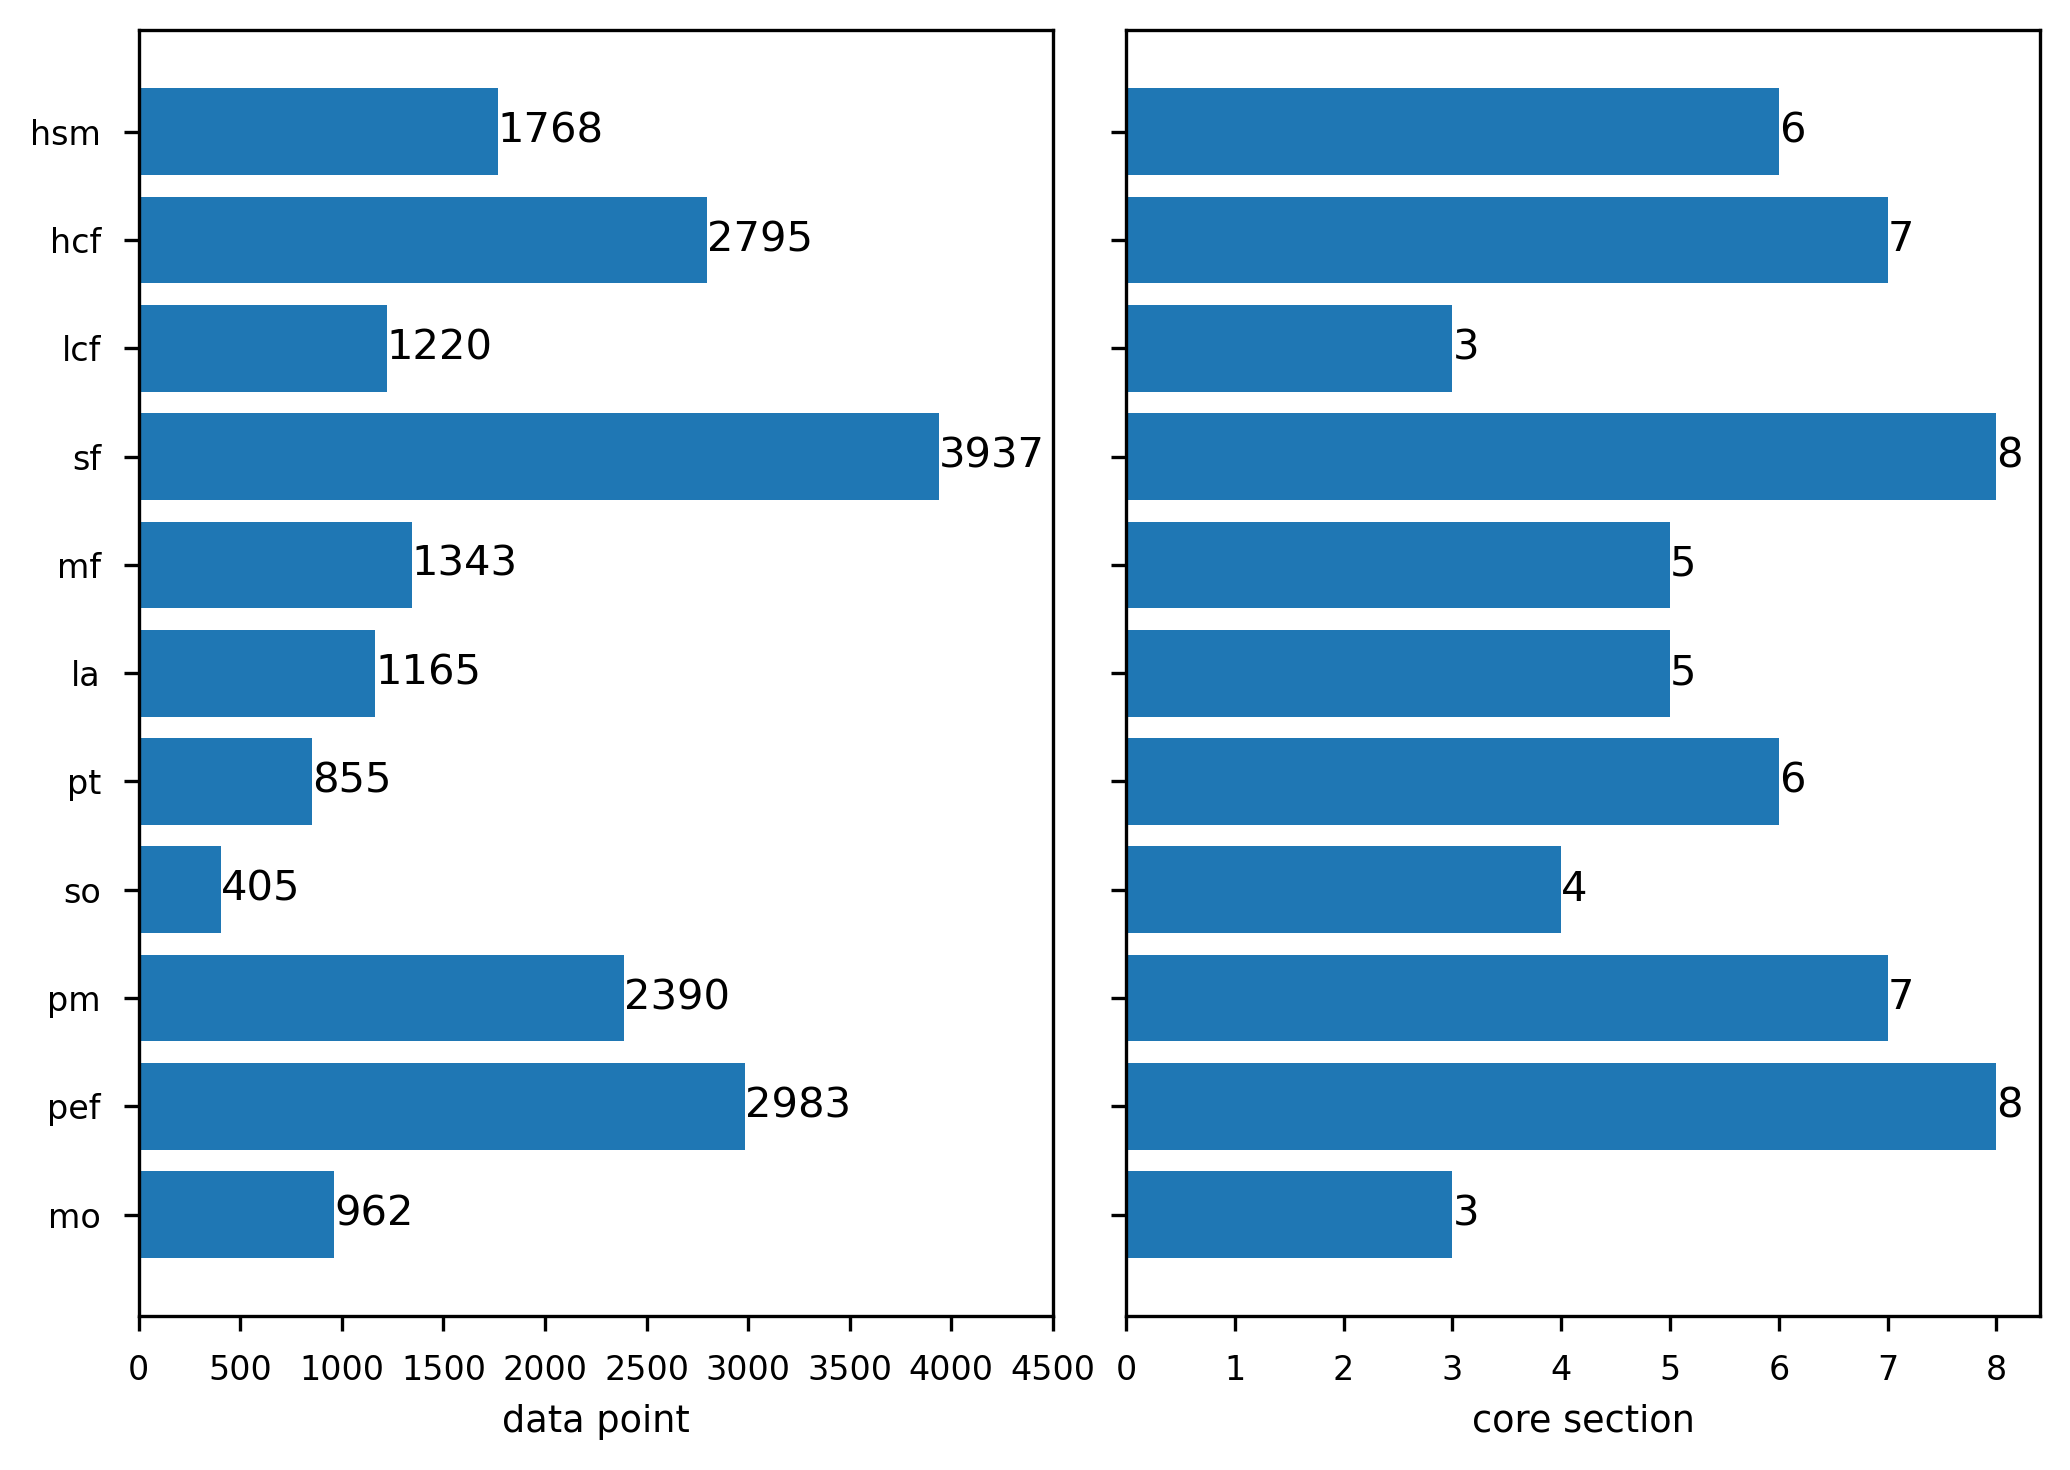

In [12]:
fig, axes = plt.subplots(1, 2, sharey='row', figsize=(7, 5))
for ax, col in zip(axes, ['data_point', 'core_section']):
    ax.barh(y=grouping.index[::-1], width=grouping[col][::-1])
    ax.set_xlabel(' '.join(col.split('_')))
    for i, row in grouping.iterrows():
        ax.text(x=row[col], 
                y=i, 
                s=row[col], va='center')

axes[0].set_xlim(0, 4500)
plt.tight_layout()
#fig.subplots_adjust(wspace=0.05)
fig.savefig('results/r_data_distribution_{}.png'.format(date))

# Evaluate the results
These grid resutls are generated from grid_r_raw_lr/svc/rf.py, grid_r_lr/svr/rf.py and grid_r_2d.py.

## LR

raw_lr with PCA
Best CV score = 0.501
C = 0.1

raw_lr without PCA
Best CV score = 0.498
C = 0.1

2d_lr with PCA
Best CV score = 0.587
C = 0.0001

2d_lr without PCA
Best CV score = 0.523
C = 0.001

roll_lr with PCA
Best CV score = 0.614
C = 0.0001

roll_lr without PCA
Best CV score = 0.626
C = 0.001



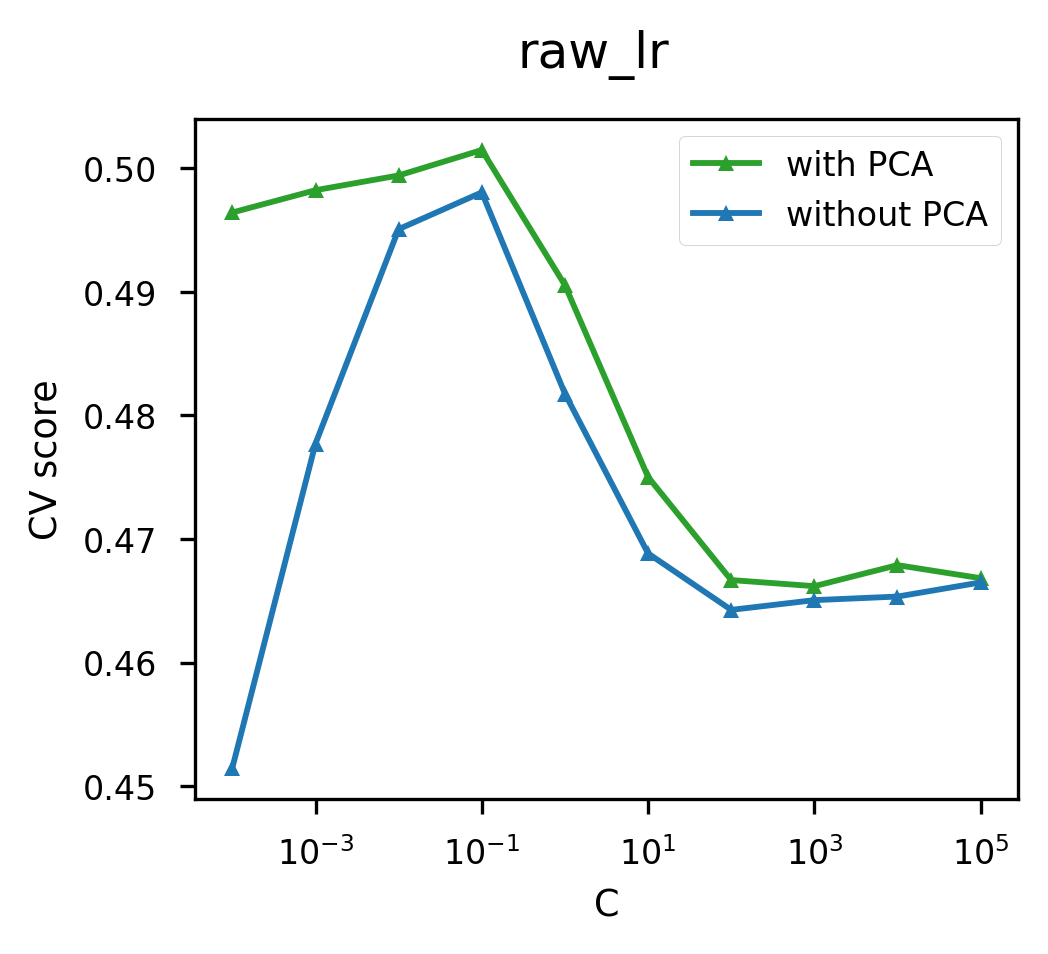

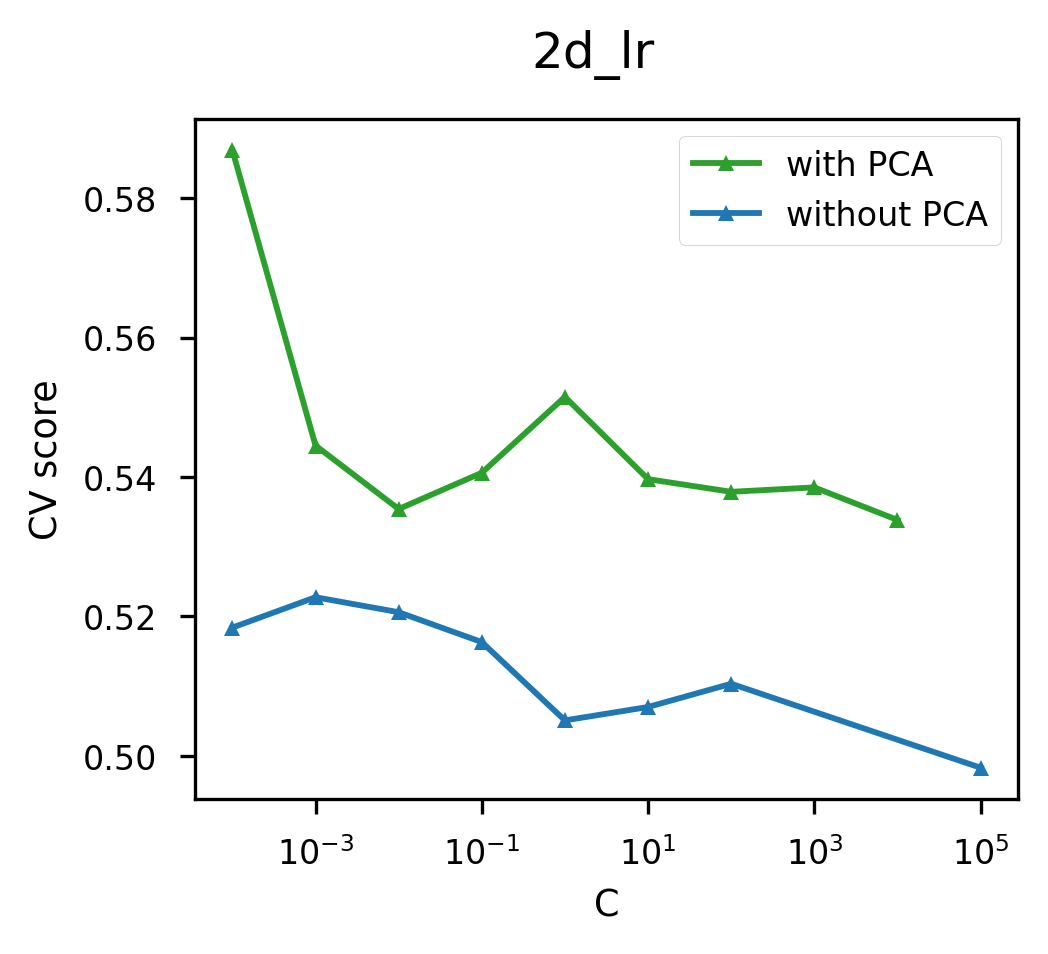

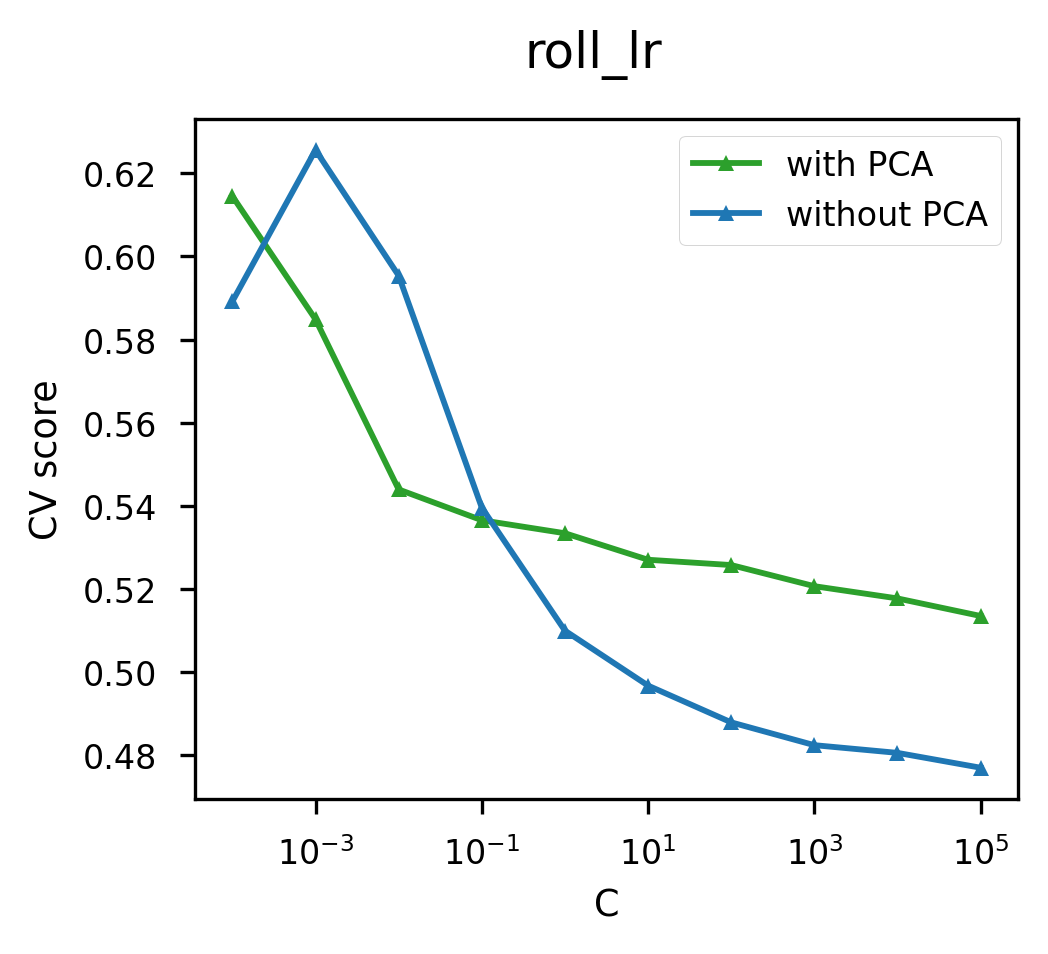

In [14]:
import glob
from matplotlib import cm

for data_dir in glob.glob('results/r_*_lr_grid_20220120.csv'):
    grid_df = pd.read_csv(data_dir, index_col = 0)
    grid_df = grid_df[~grid_df.mean_test_score.isna()]
    data_type = data_dir[10:-18]
    
    fig = plt.figure(figsize = (3.54, 3))
    plt.xscale('log')
    
    for pca, mask, color in zip(['with PCA', 'without PCA'],
                               [~grid_df.param_pca.isna(), 
                                grid_df.param_pca.isna()],
                               ['C2', 'C0']):
        xx = grid_df.loc[mask, 'param_lr__C'].values.astype(float)
        yy = grid_df.loc[mask, 'mean_test_score'].values.astype(float)
        max_index = np.argmax(yy)
        plt.plot(xx, yy, marker='^', ms=4, label=pca, c=color)
        text = '{} {}\nBest CV score = {:.3f}\nC = {}\n'.format(data_type, 
                                                           pca,
                                                           yy[max_index],
                                                           xx[max_index])
        print(text)
    plt.ylabel('CV score')
    plt.xlabel('C')
    plt.legend()
    plt.suptitle(data_type)
    fig.savefig('results/r_{}_grid_combined_{}.png'.format(data_type, date))

## SVC

roll_svc, with PCA
Best score = 0.582
$\gamma = 0.001, C = 0.1$

roll_svc, without PCA
Best score = 0.611
$\gamma = 0.001, C = 1.0$

2d_svc, with PCA
Best score = 0.546
$\gamma = 0.001, C = 100.0$

2d_svc, without PCA
Best score = 0.544
$\gamma = 0.001, C = 1.0$

raw_svc, with PCA
Best score = 0.518
$\gamma = 0.001, C = 10.0$

raw_svc, without PCA
Best score = 0.516
$\gamma = 0.01, C = 1.0$



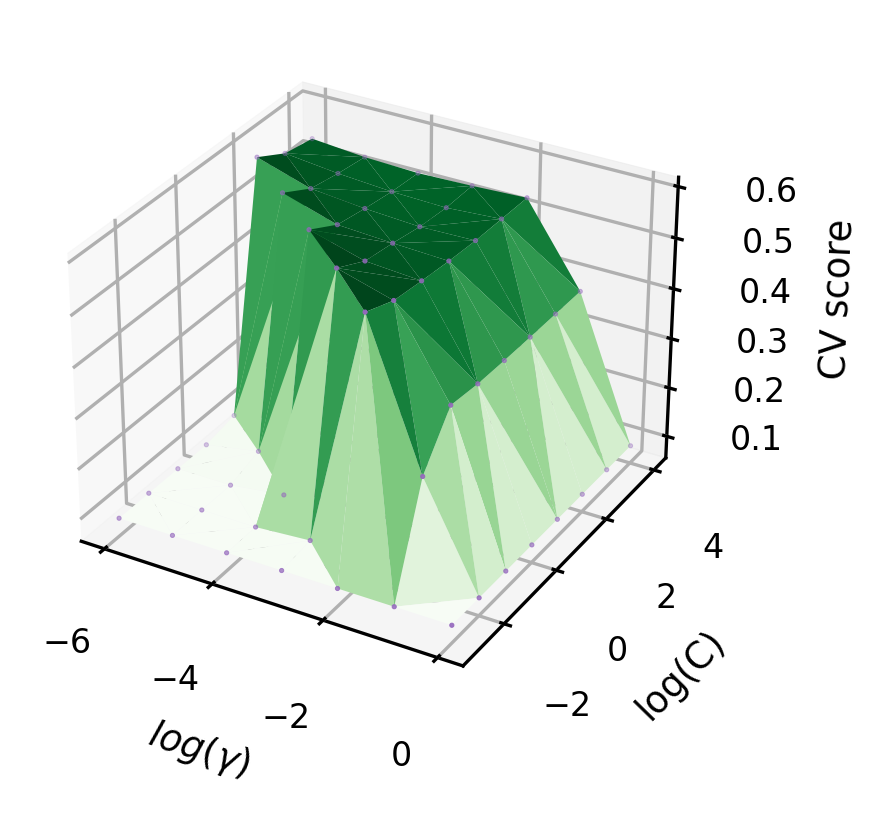

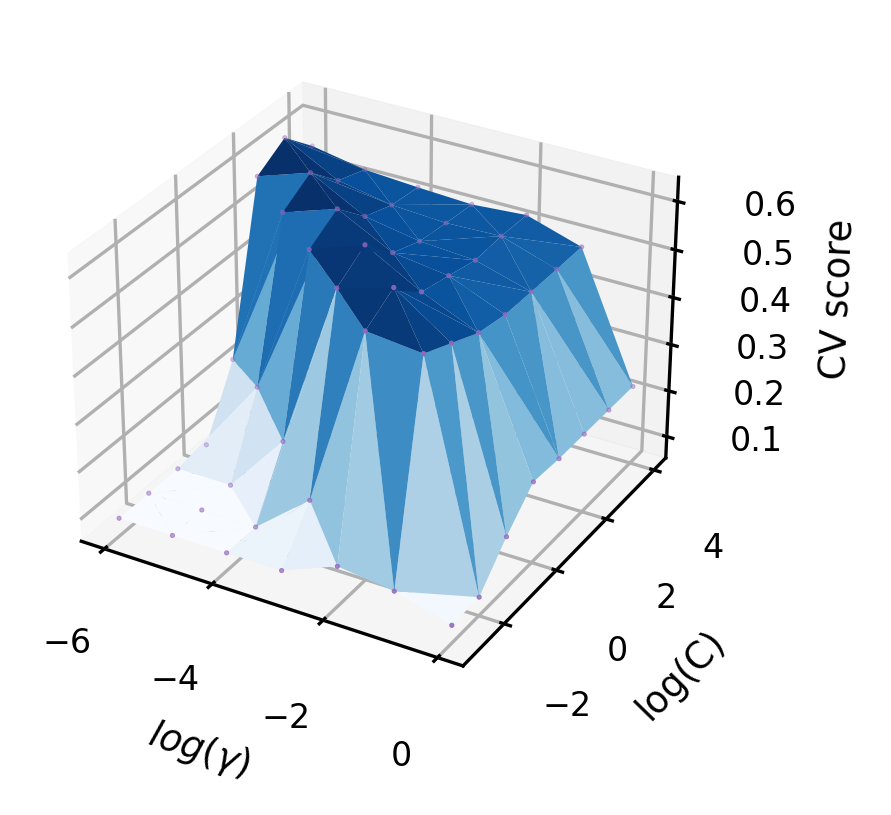

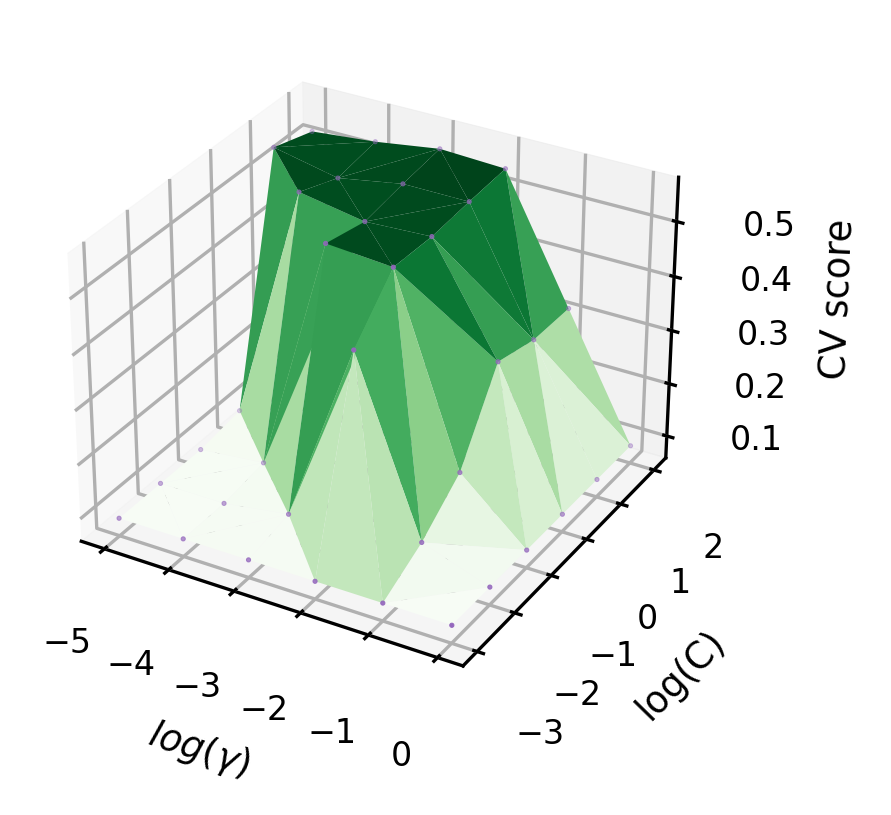

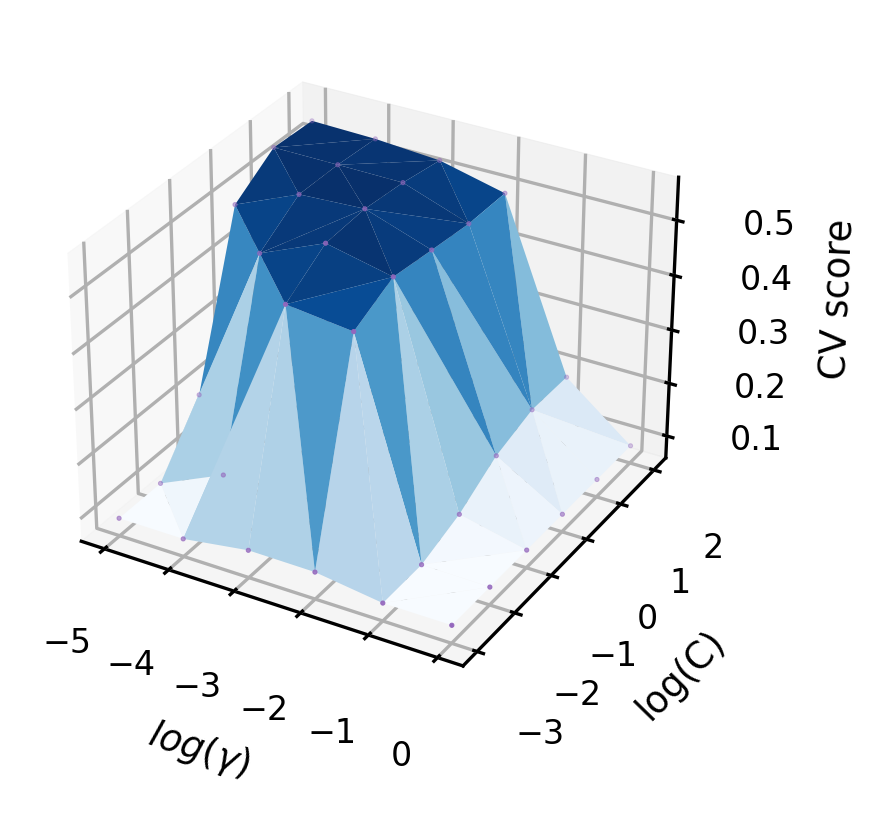

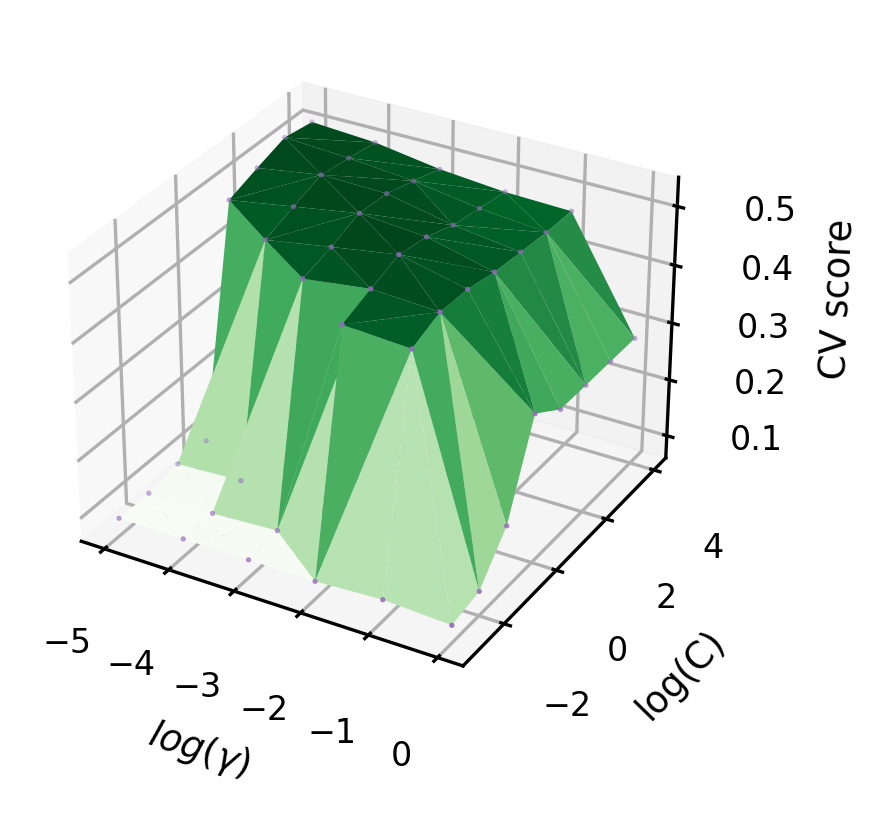

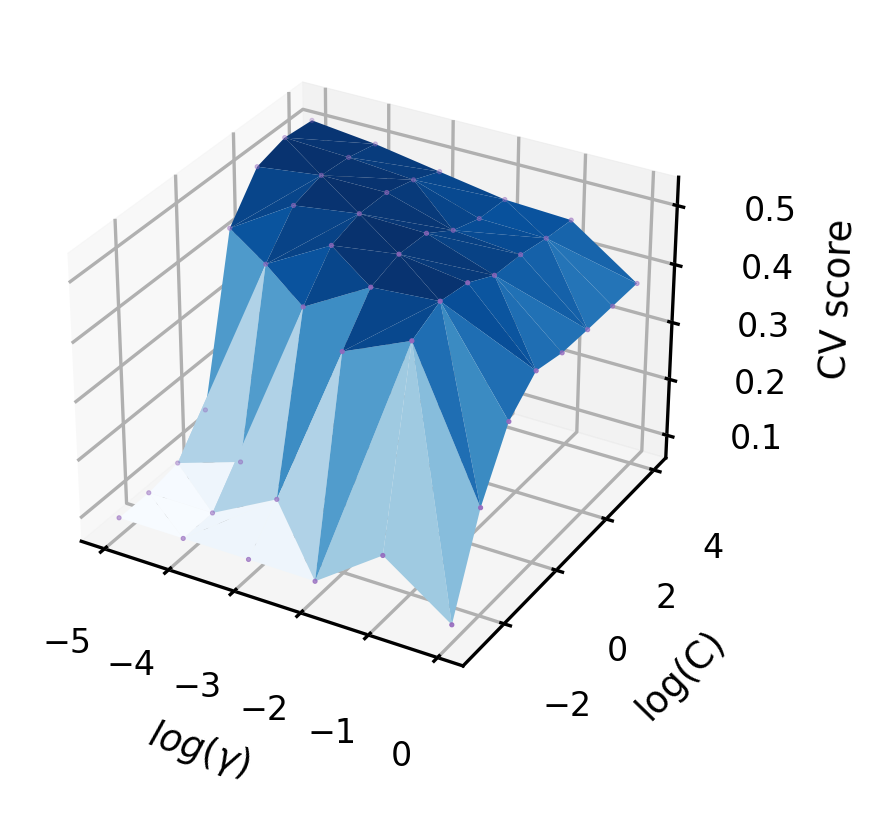

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

for data_dir in glob.glob('results/r_*_svc_grid_20220120.csv'):
    grid_df = pd.read_csv(data_dir, index_col = 0)
    for pca, mask, cmap in zip(['with PCA', 'without PCA'],
                               [~grid_df.param_pca.isna(), 
                                grid_df.param_pca.isna()],
                               [cm.Greens, cm.Blues]):
        data_type = data_dir[10:-18]
        fig = plt.figure(figsize = (3.54, 3))
        ax = plt.gca(projection='3d')
        xx = grid_df.loc[mask, 'param_svc__gamma'].values.astype(float)
        yy = grid_df.loc[mask, 'param_svc__C'].values.astype(float)
        zz = grid_df.loc[mask, 'mean_test_score'].values.astype(float)
        max_index = np.argmax(zz)
        
        surf = ax.plot_trisurf(np.log10(xx), np.log10(yy), zz, cmap = cmap, linewidth = 0.1)
        ax.scatter(np.log10(xx), np.log10(yy), zz, c = 'C4', s = 1)

        # mark the best score
        text = '{}, {}\nBest score = {:.3f}\n$\gamma = {}, C = {}$\n'.format(data_type,
                                                                             pca,
                                                                             zz[max_index], 
                                                                             xx[max_index], 
                                                                             yy[max_index])
        print(text)
        #ax.text(-1, -2, .87, text, fontsize = 10)
        #ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
        #          .3, .3, .3, color='gray', alpha=.6)

        ax.set_xlabel('$log(\gamma)$')
        ax.set_ylabel('log(C)')
        ax.set_zlabel('CV score')
        #fig.colorbar(surf, shrink = 0.5, aspect = 5)
        if len(pca) > 8:
            fig.savefig('results/r_{}_grid_{}.png'.format(data_type, date))
        else:
            fig.savefig('results/r_{}+pca_grid_{}.png'.format(data_type, date))

## RF

raw_rf, with PCA
Best CV score = 0.480
max_depth = 10.0,
n_estimators = 1000.0

raw_rf, without PCA
Best CV score = 0.514
max_depth = 5.0,
n_estimators = 5000.0

roll_rf, with PCA
Best CV score = 0.582
max_depth = 3.0,
n_estimators = 5000.0

roll_rf, without PCA
Best CV score = 0.557
max_depth = 3.0,
n_estimators = 100.0

2d_rf, with PCA
Best CV score = 0.522
max_depth = 3.0,
n_estimators = 100.0

2d_rf, without PCA
Best CV score = 0.530
max_depth = 10.0,
n_estimators = 10000.0



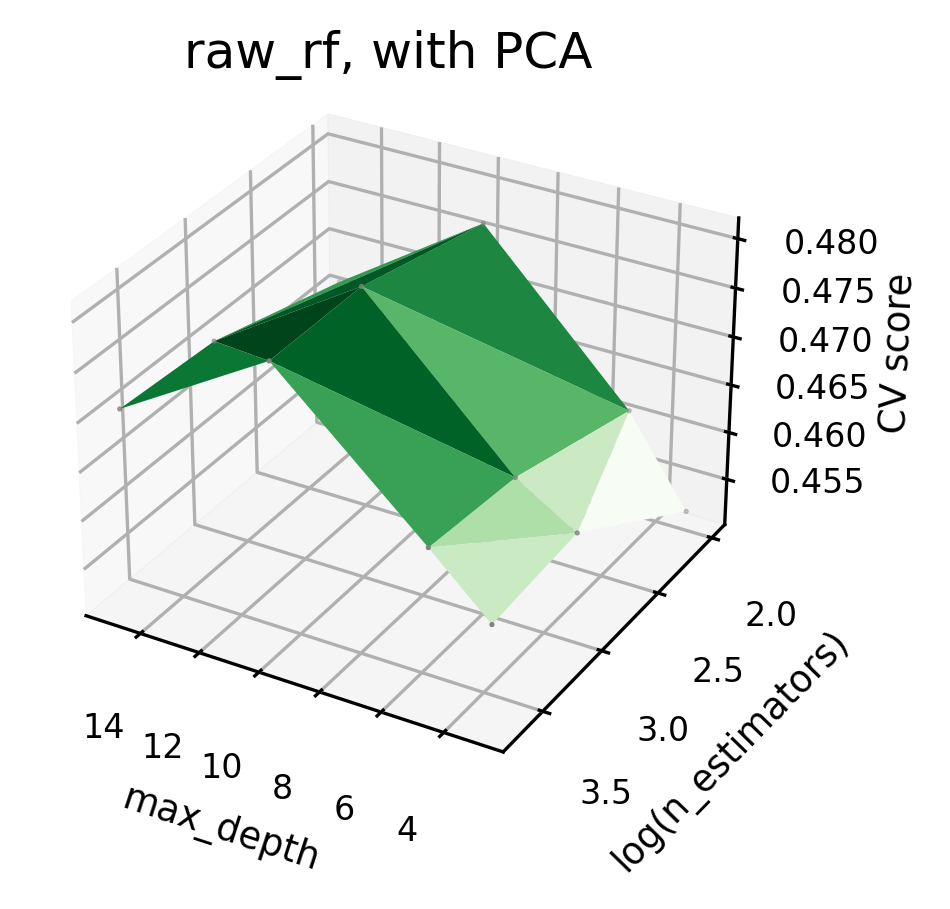

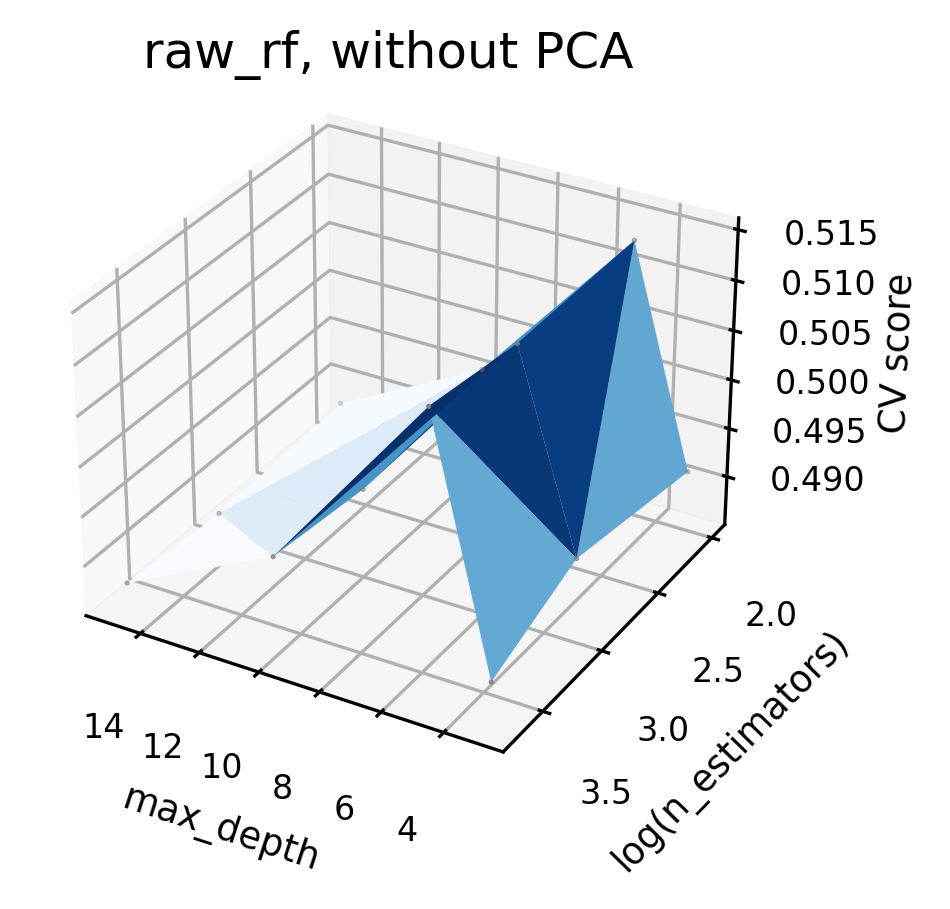

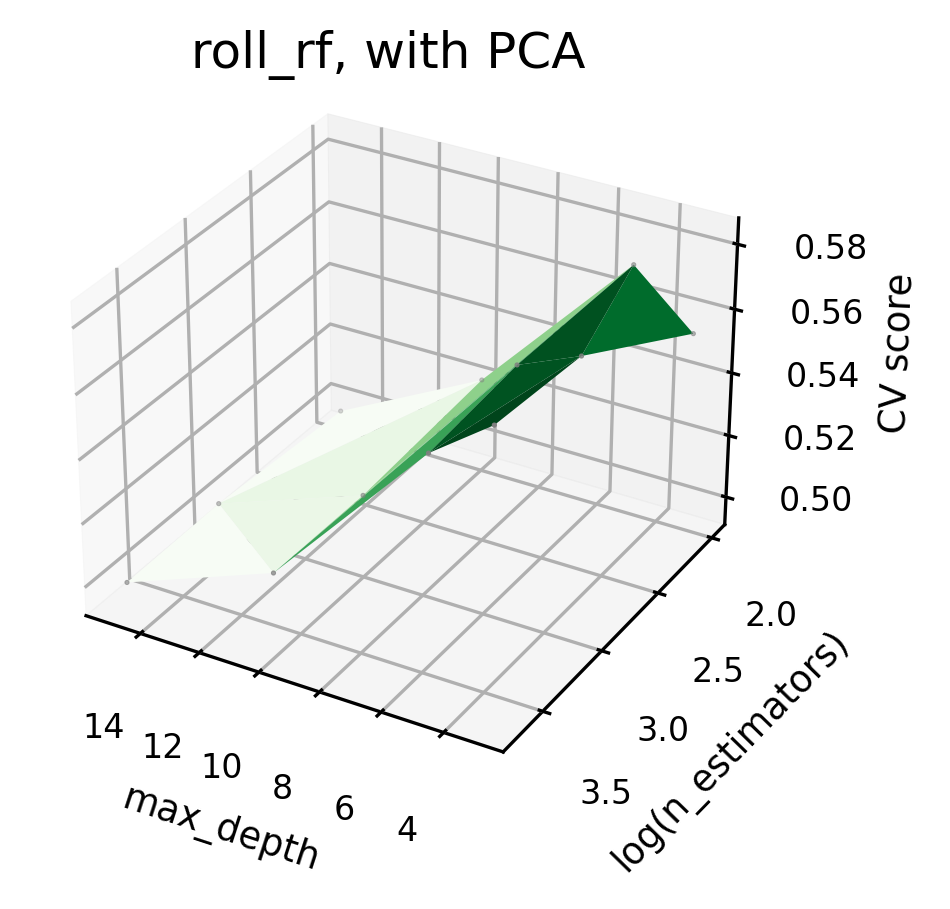

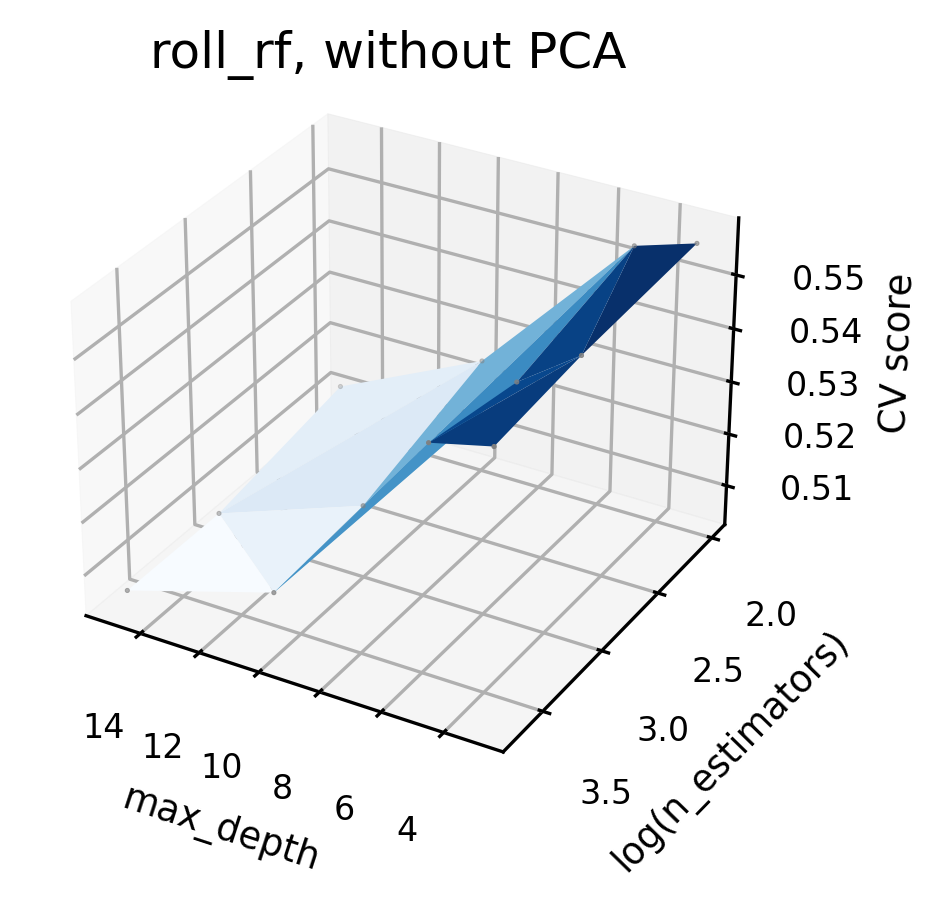

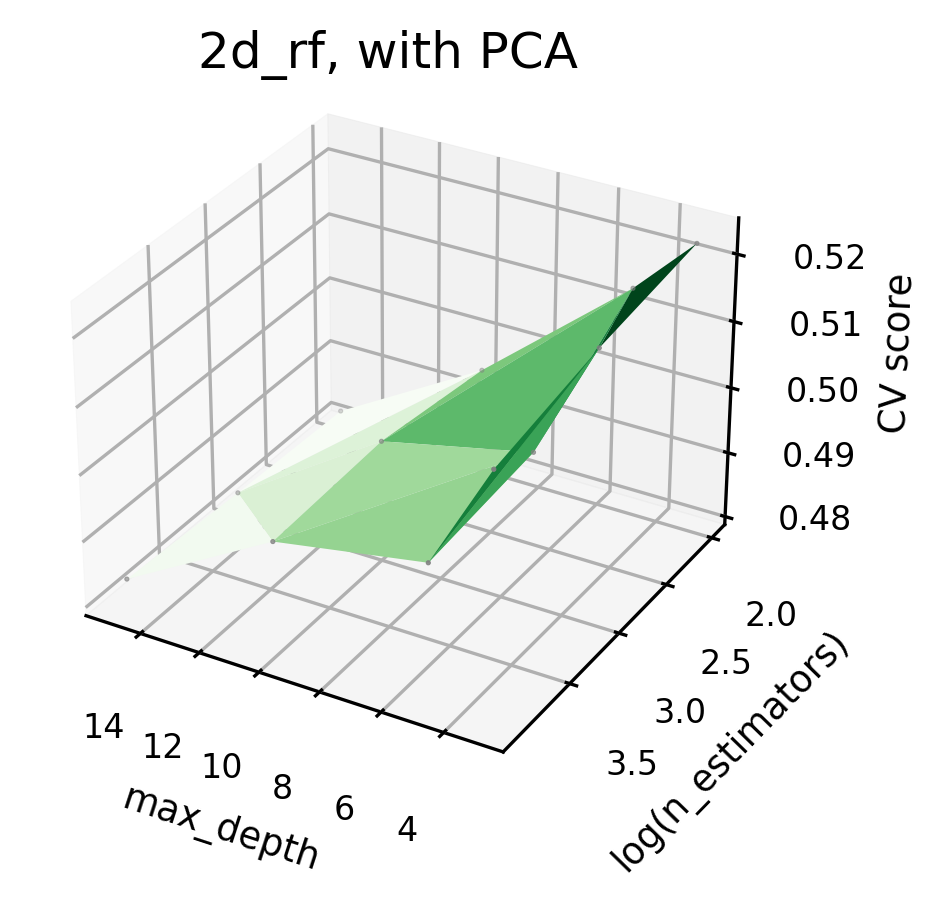

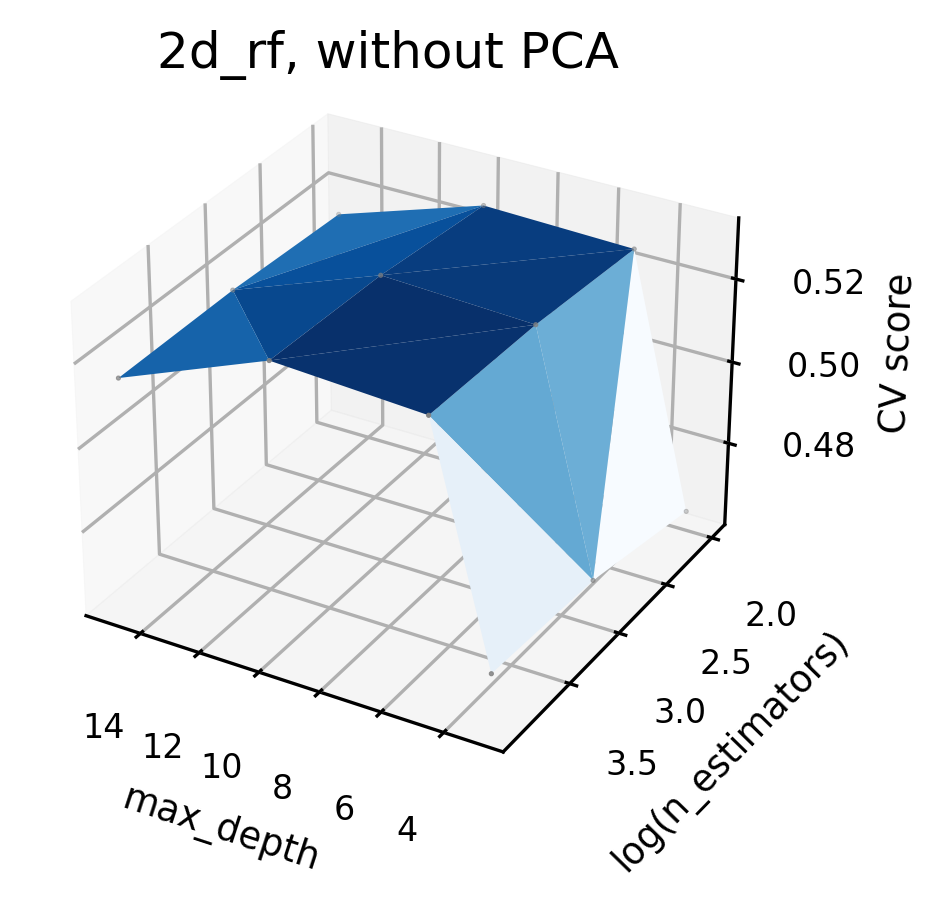

In [31]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

for data_dir in glob.glob('results/r_*_rf_grid_20220120.csv'):
    grid_df = pd.read_csv(data_dir, index_col = 0)
    data_type = data_dir[10:-18]

    # with and without PCA
    for pca, mask, cmap in zip(['with PCA', 'without PCA'],
                                    [~grid_df.param_pca.isna(), 
                                     grid_df.param_pca.isna()], 
                                    [cm.Greens, cm.Blues]):
        fig = plt.figure(figsize = (3.54, 3))
        ax = plt.gca(projection='3d')
        xx = grid_df.loc[mask, 'param_rf__max_depth'].values.astype(float)
        yy = grid_df.loc[mask, 'param_rf__n_estimators'].values.astype(float)
        zz = grid_df.loc[mask, 'mean_test_score'].values.astype(float)
        max_index = np.argmax(zz)

        surf = ax.plot_trisurf(xx, np.log10(yy), zz, cmap = cmap, linewidth = 0.1)
        ax.scatter(xx, np.log10(yy), zz, c = 'grey', s = 1)

        # mark the best score
        text = '{}, {}\nBest CV score = {:.3f}\nmax_depth = {},\nn_estimators = {}\n'.format(
            data_type,
            pca,
            zz[max_index], 
            xx[max_index], 
            yy[max_index])
        #ax.text(12, 2.2, .65, text, fontsize = 10)
        print(text)
        #ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
        #          .3, .3, .3, color='gray', alpha=.6)

        #ax.set_zticks(np.linspace(0.47, 0.51, 5))
        ax.set_yticks(np.linspace(2, 3.5, 4))
        ax.set_xlabel('max_depth')
        ax.set_ylabel('log(n_estimators)')
        ax.set_zlabel('CV score')
        #fig.colorbar(surf, shrink = 0.5, aspect = 5)
        fig.suptitle('{}, {}'.format(data_type,pca))
        fig.subplots_adjust(top=.95)
        # rotate the axes
        ax.view_init(30, 120)
        if len(pca) > 8:
            fig.savefig('results/r_{}_grid_{}.png'.format(data_type, date))
        else:
            fig.savefig('results/r_{}+pca_grid_{}.png'.format(data_type, date))

Most of the grid searches reach peak or plateau. Only 2d_RF not yet forming a peak. But the highest score already stands at the max_depth=4, which is very shallow, so I don't think searching further is necessary.

## Put together

In [5]:
import glob
grid_df = pd.DataFrame()
data_list = []
alg_list = []
pca_list = []

for data_dir in glob.glob('results/r_*_grid_20220120.csv'):
    
    X1 = pd.read_csv(data_dir, index_col=0)

    for mask, pca in zip([X1.param_pca.isna(), ~X1.param_pca.isna()], ['no', 'yes']):
        X2 = X1[mask].reset_index(drop=True)
        grid_df = pd.concat([grid_df, X2.iloc[np.argmax(X2.mean_test_score), :]], axis=1, join='outer')
        data_list.append(data_dir.split('_')[1])
        alg_list.append(data_dir.split('_')[2])
        pca_list.append(pca)

grid_df = grid_df.T
grid_df['data'] = data_list
grid_df['alg'] = alg_list
grid_df['pca'] = pca_list

grid_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_pca,params,split0_test_score,split1_test_score,split2_test_score,...,std_test_score,rank_test_score,param_rf__max_depth,param_rf__n_estimators,param_scaling,param_svc__C,param_svc__gamma,data,alg,pca
3,1.550458,0.218712,0.005439,0.000174,0.1,NaN,"{'lr__C': 0.1, 'pca': None}",0.523349,0.571322,0.543248,...,0.079434,4,NaN,NaN,NaN,NaN,NaN,raw,lr,no
3,1.015444,0.159766,0.00704,0.000952,0.1,PCA(whiten=True),"{'lr__C': 0.1, 'pca': PCA(whiten=True)}",0.513402,0.573458,0.543323,...,0.072596,1,NaN,NaN,NaN,NaN,NaN,raw,lr,yes
5,100.910202,4.312628,3.083748,0.678184,NaN,NaN,"{'pca': None, 'rf__max_depth': 5, 'rf__n_estim...",0.515039,0.58998,0.570078,...,0.087442,1,5,5000,NaN,NaN,NaN,raw,rf,no
7,24.793201,1.035902,2.143548,0.333112,NaN,PCA(whiten=True),"{'pca': PCA(whiten=True), 'rf__max_depth': 10,...",0.511633,0.550157,0.505814,...,0.07147,13,10,1000,NaN,NaN,NaN,raw,rf,yes
24,2.856047,0.270792,1.314926,0.080586,NaN,NaN,"{'pca': None, 'scaling': StandardScaler(), 'sv...",0.596411,0.719259,0.615897,...,0.063259,1,NaN,NaN,StandardScaler(),1.0,0.001,roll,svc,no
17,13.144488,0.825871,2.37145,0.10853,NaN,PCA(whiten=True),"{'pca': PCA(whiten=True), 'scaling': StandardS...",0.627999,0.627036,0.593091,...,0.058442,6,NaN,NaN,StandardScaler(),0.1,0.001,roll,svc,yes
20,14.12607,1.708435,9.673466,0.464898,NaN,NaN,"{'pca': None, 'svc__C': 1.0, 'svc__gamma': 0.001}",0.564751,0.66707,0.543581,...,0.087841,3,NaN,NaN,NaN,1.0,0.001,2d,svc,no
32,2.296071,0.151812,0.830215,0.061374,NaN,"PCA(n_components=50, whiten=True)","{'pca': PCA(n_components=50, whiten=True), 'sv...",0.529885,0.634522,0.619588,...,0.076605,1,NaN,NaN,NaN,100.0,0.001,2d,svc,yes
1,9.669957,1.855004,0.017828,0.001477,0.001,NaN,"{'lr__C': 0.001, 'pca': None}",0.537968,0.626083,0.551949,...,0.082669,10,NaN,NaN,NaN,NaN,NaN,2d,lr,no
0,1.546021,0.026087,0.031302,0.003165,0.0001,"PCA(n_components=50, whiten=True)","{'lr__C': 0.0001, 'pca': PCA(n_components=50, ...",0.609298,0.65571,0.623762,...,0.078838,1,NaN,NaN,NaN,NaN,NaN,2d,lr,yes


In [6]:
grid_df.shape

(18, 23)

20220120


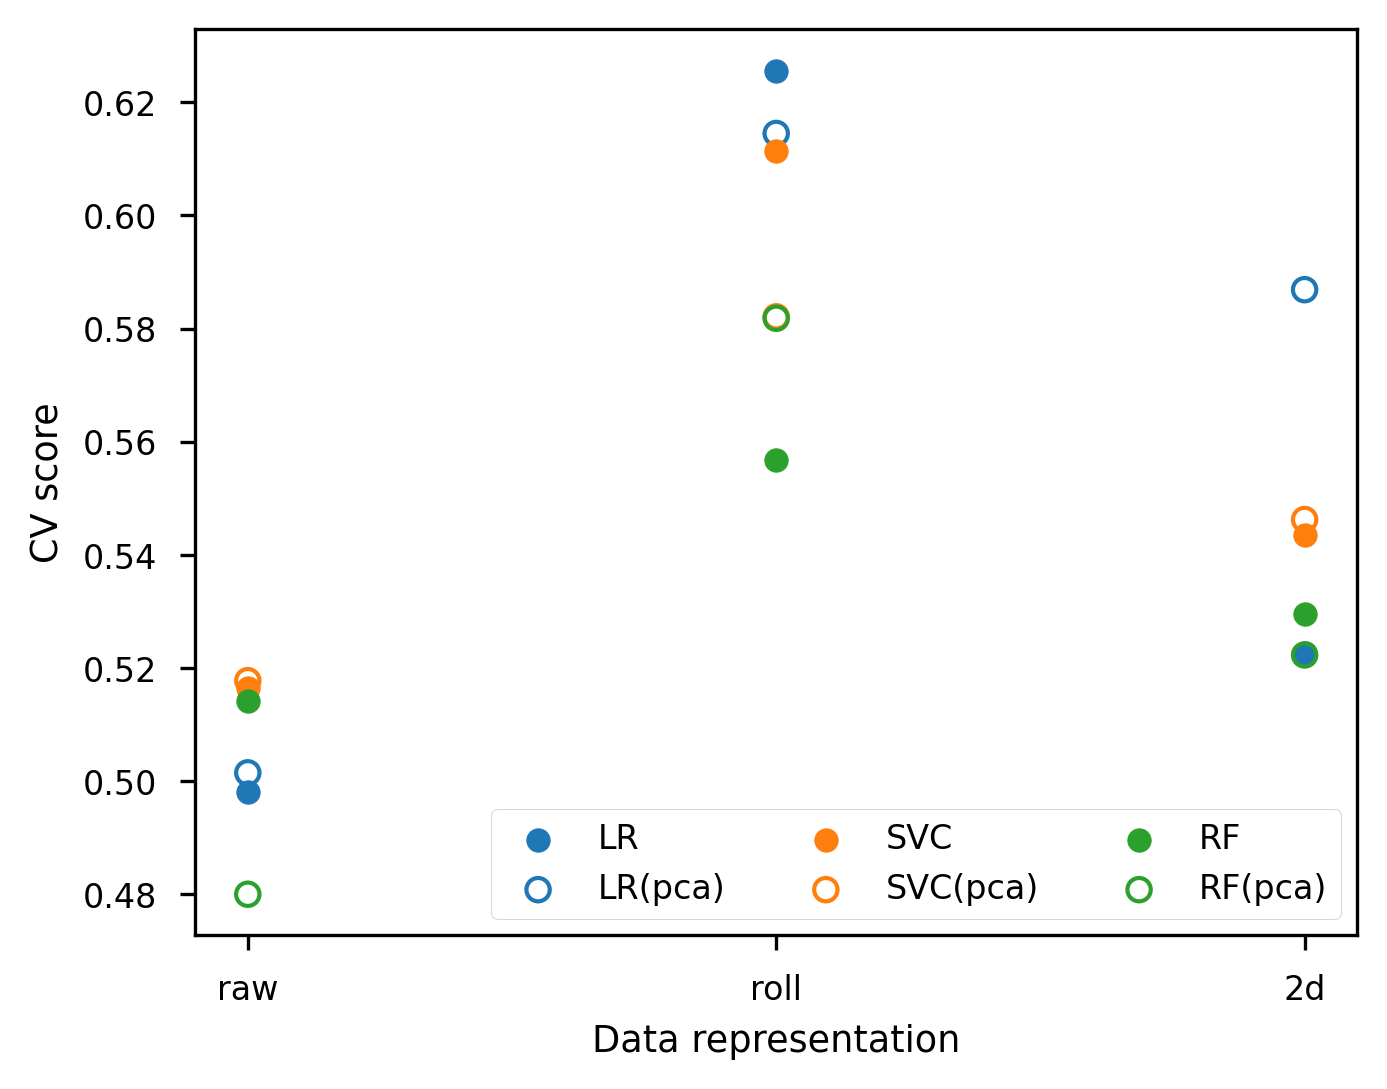

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
for data in ['raw', 'roll', '2d']:
    # small trick to plot part of legend
    if data == 'roll':
        ax.legend(loc='lower right', ncol=3)
    for alg, color in zip(['lr', 'svc', 'rf'], ['C0', 'C1', 'C2']):
        # without PCA
        mask = (grid_df.data == data) & (grid_df.alg == alg) & (grid_df.pca == 'no')
        ax.scatter(
            data, 
            grid_df.mean_test_score[mask], 
            facecolors=color,
            label=alg.upper())
        # with PCA
        mask = (grid_df.data == data) & (grid_df.alg == alg) & (grid_df.pca == 'yes')
        ax.scatter(
            data, 
            grid_df.mean_test_score[mask], 
            facecolors='none', 
            edgecolors=color,
            linewidths=1,
            label='{}(pca)'.format(alg.upper()))
ax.set_xlabel('Data representation')
ax.set_ylabel('CV score')

plt.savefig('results/r_grids_{}.png'.format(date))
print(date)

1. There is no clear trend saying that having PCA for preprocessing is better. 
1. Overall, the data representation of rolling gives better performance (roll>2d>raw). It even takes the first three positions of all performances.
1. Non-linear algorithms give almost no advantages comparing to the linear algorithm. SVC only gives the best performance in the raw data when RF usually gives the worst. It's surprising that the linear algoritm surpasses the non-linear ones. It may tell that our data representations (rolling, 2d) indeed enhance the apearing of important information, which makes the linear algorithm a better fit than those high complexity algorithms.

In [35]:
for data in ['raw', 'roll', '2d']:
    X = grid_df[grid_df.data == data].reset_index(drop=True)
    print('Best CV score in {} data: {:.2f}'.format(data, X['mean_test_score'].max()))

Best CV score in raw data: 0.52
Best CV score in roll data: 0.63
Best CV score in 2d data: 0.59


Actually these CV scores are no better than those of the data before reclassification.

## Check accuracy and boundaries
Use test set to see the performance. I don't use training-dev-test sets now because I think it's enough for a paper especially my time is ticking.

In [37]:
from wasafacies import PrepareData, Split
from joblib import load

prepare = PrepareData()
facies, id_list = prepare.create_recla()
y_dict = {}

for data_df, model_dir, data_type in zip(
    [prepare.create_raw(facies=facies, id_list=id_list),
     prepare.create_roll(facies=facies, id_list=id_list),
     prepare.create_2d(facies=facies, id_list=id_list, half_window=8)],
    ['models/r_raw_svc_model_20220120.joblib', 
     'models/r_roll_lr_model_20220120.joblib',
     'models/r_2d_lr_model_20220120.joblib'],
     ['raw', 'roll', '2d']):

     X = data_df.iloc[:, :-2].values
     y = data_df['facies'].values
     groups = data_df['core_section'].values
     train_idx, test_idx = Split.train_test_split(y, groups)

     model = load(model_dir)
     y_dict['y_{}'.format(data_type)] = pd.Series(
         model.predict(data_df.iloc[test_idx, :-2]), 
         index=data_df.index[test_idx],
         name='y_{}'.format(data_type))

In [38]:
data_df = prepare.create_raw(facies=facies, id_list=id_list)
y_df = pd.concat([y_dict['y_raw'], y_dict['y_roll'], y_dict['y_2d']],
                 axis=1, join='outer')
y_df = pd.concat([y_df, data_df[['facies', 'core_section']]],
                 axis=1, join='inner')
y_df.columns = ['y_raw', 'y_roll', 'y_2d', 'y', 'core_section']
y_df

,y_raw,y_roll,y_2d,y,core_section
N11_02945,5,NaN,NaN,4,N11-1
N11_02947,5,NaN,NaN,4,N11-1
N11_02949,5,NaN,NaN,4,N11-1
N11_02951,5,NaN,NaN,4,N11-1
N11_02953,5,NaN,NaN,4,N11-1
...,...,...,...,...,...
VVC20_04735,7,NaN,NaN,9,VVC20-1
VVC20_04737,7,NaN,NaN,9,VVC20-1
VVC20_04739,7,NaN,NaN,9,VVC20-1
VVC20_04741,7,NaN,NaN,9,VVC20-1


In [51]:
y_df.to_csv('results/r_ys_{}.csv'.format(date))

In [17]:
y_df = pd.read_csv('results/r_ys_20220120.csv', index_col=0)

In [18]:
from wasafacies import Evaluation
eva = Evaluation()
Facies = eva.get_Facies()
con_dict = eva.make_recall(y_df, ['y_raw', 'y_roll', 'y_2d'], Facies)

In [7]:
Facies

array(['hsm', 'hcf', 'lcf', 'sf', 'mf', 'la', 'pt', 'so', 'pm', 'pef',
       'mo'], dtype=object)

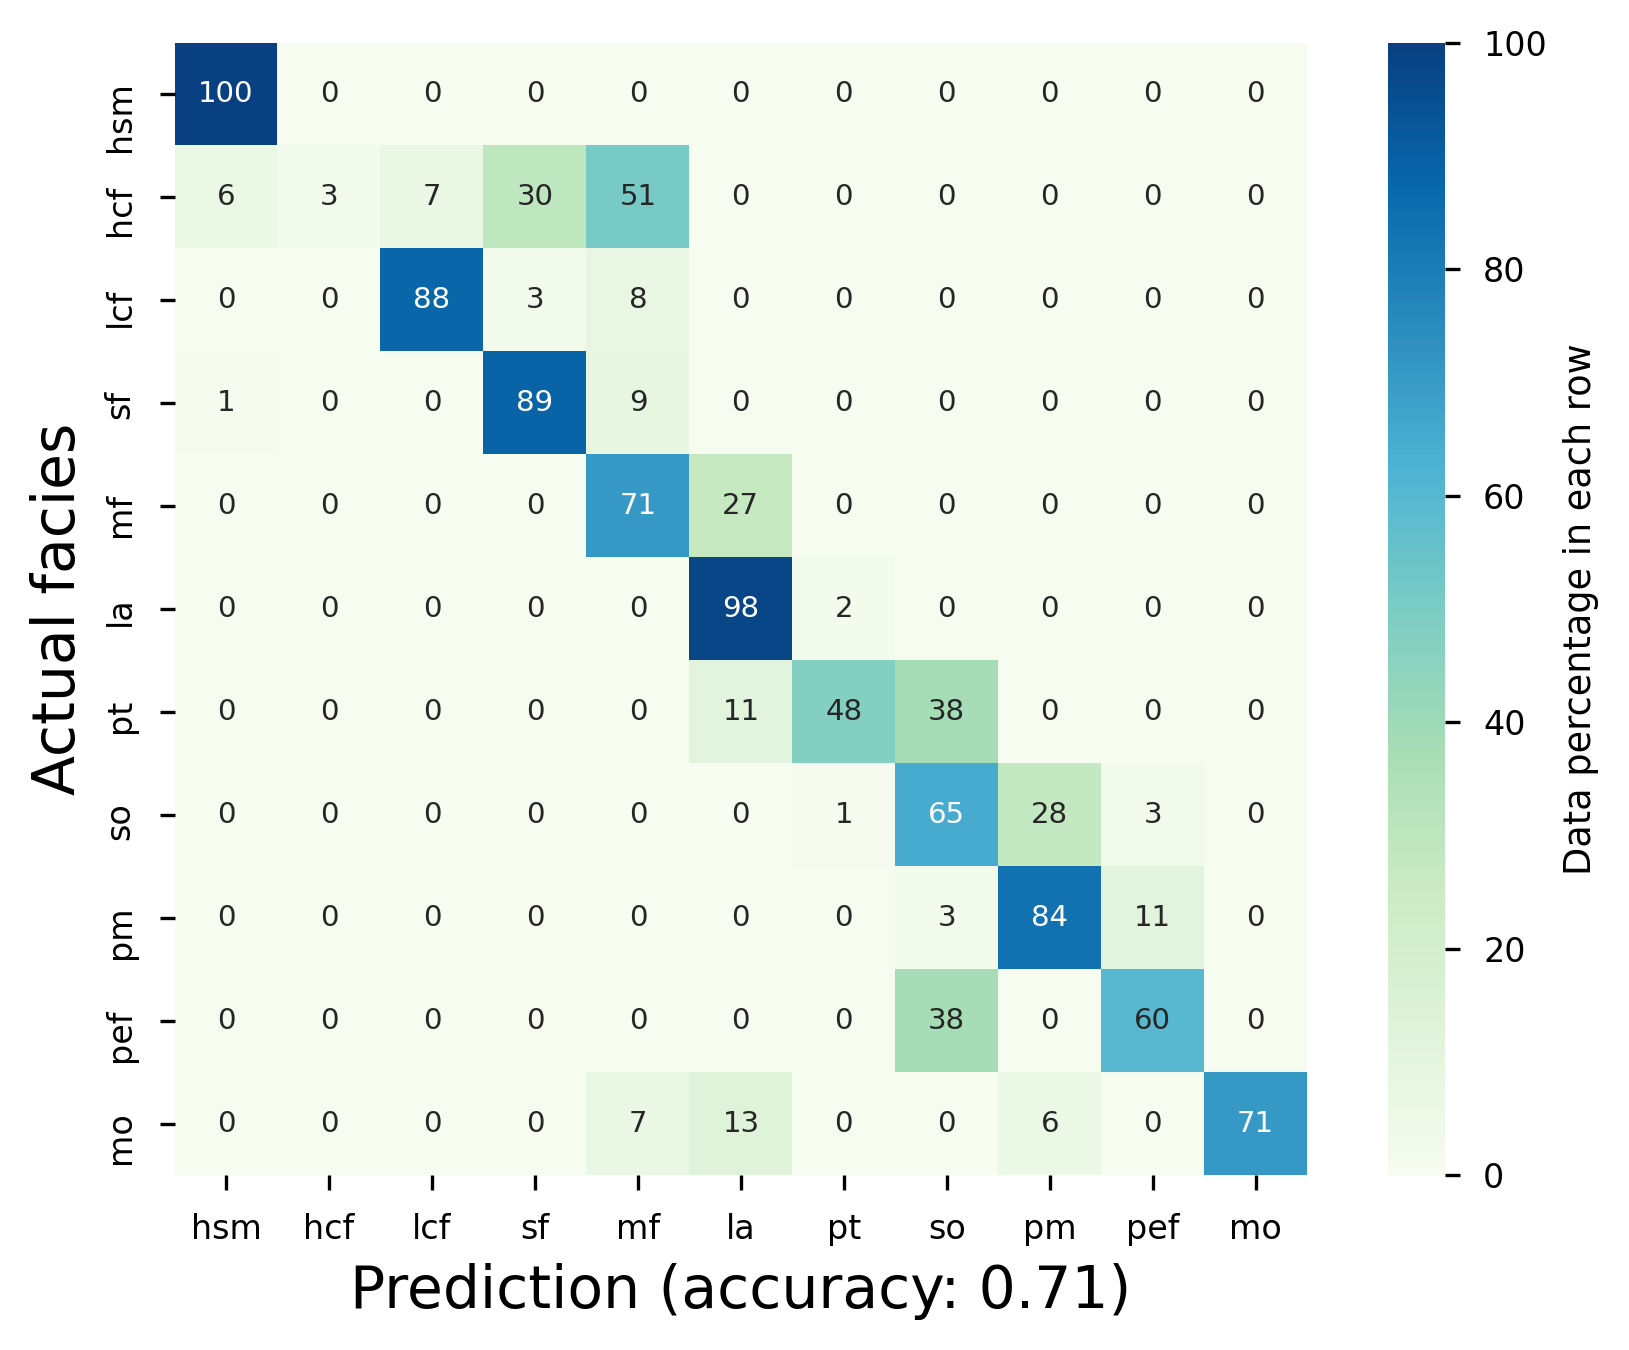

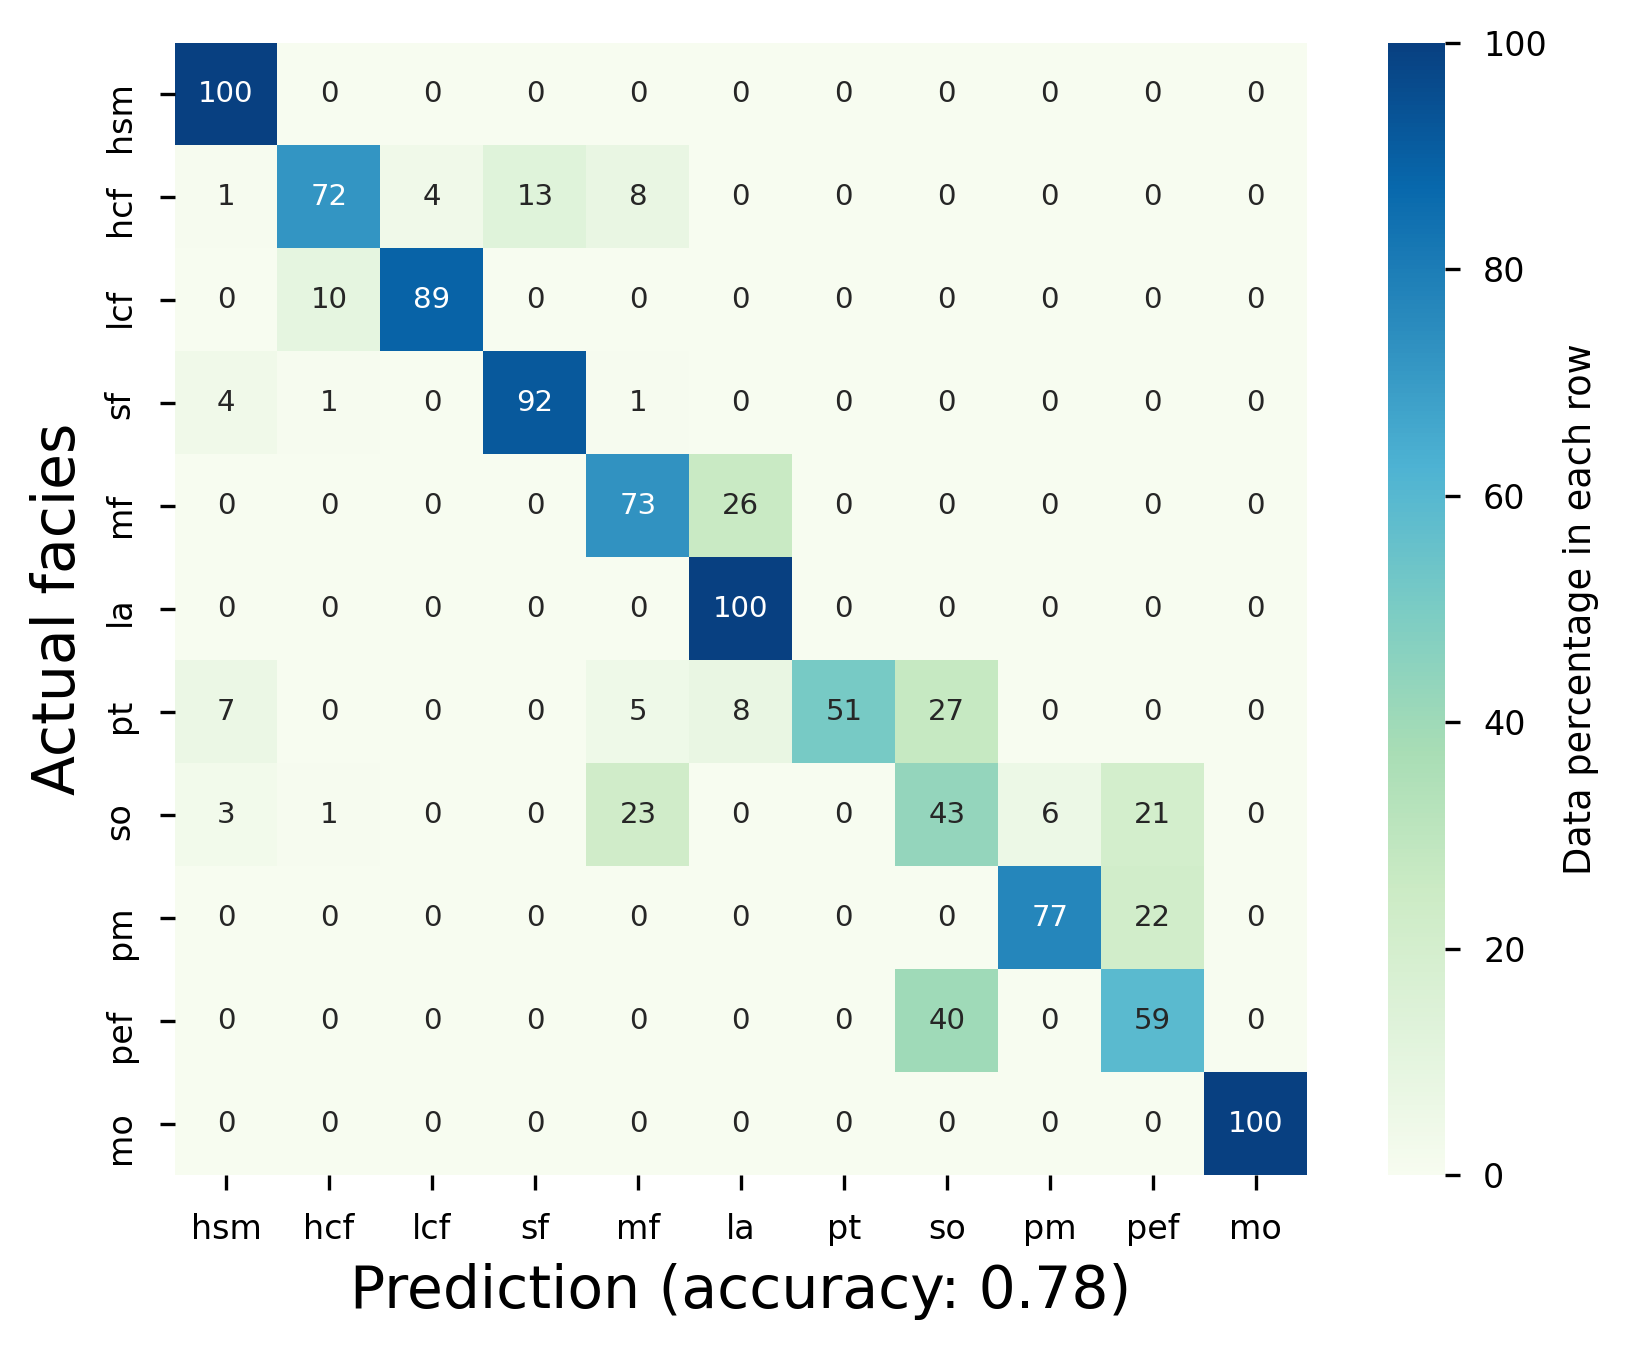

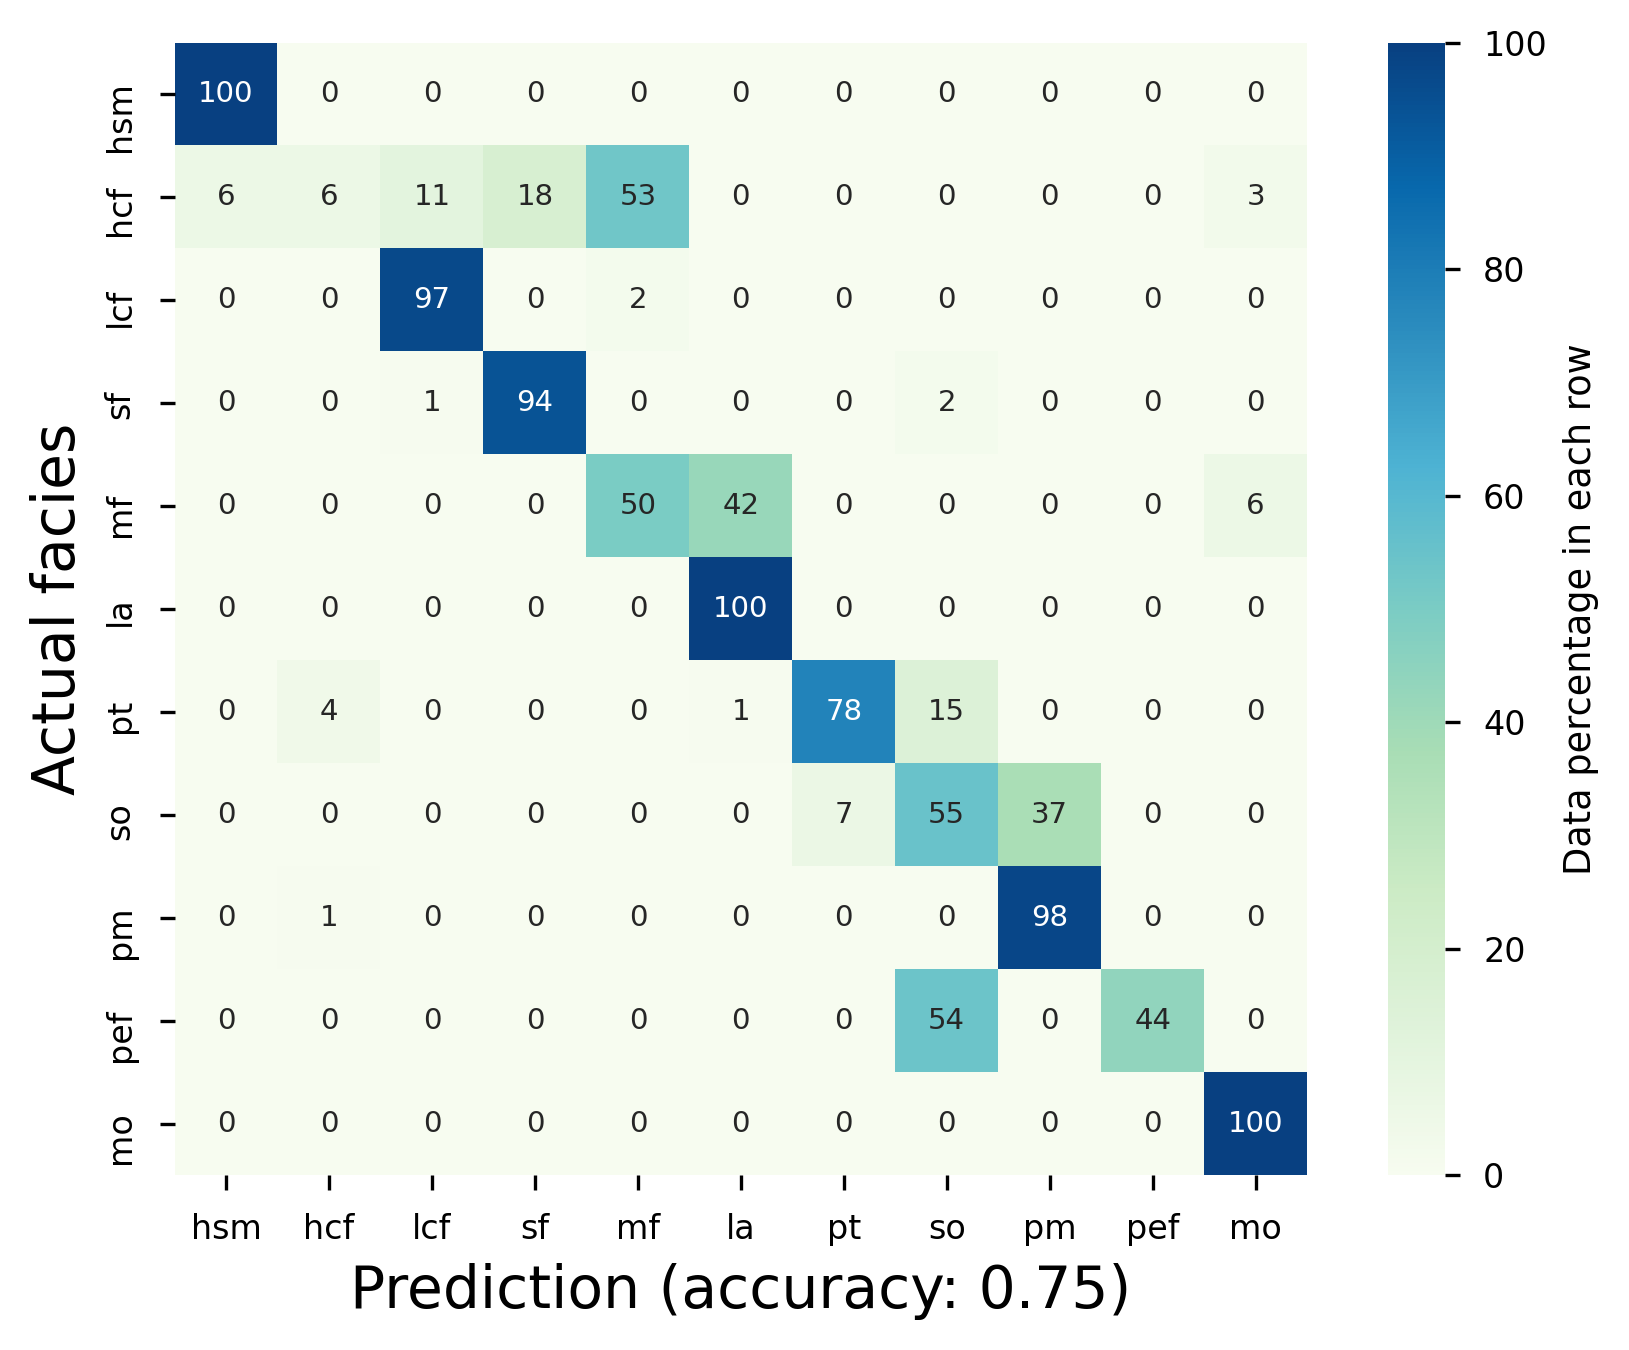

In [10]:
from sklearn.metrics import balanced_accuracy_score as score
import seaborn as sns


# Plot the matrix
for key in con_dict.keys():    
    fig, ax = plt.subplots(1, 1, figsize = (7, 5))
    sns.heatmap(
                con_dict[key], annot=con_dict[key].astype(str), ax=ax, cmap='GnBu', 
                square=True, vmin=0, vmax=100, xticklabels=con_dict[key].index, 
                yticklabels=con_dict[key].columns, fmt='s', annot_kws={'size': 7}, 
                cbar_kws={'label' : 'Data percentage in each row'}
                )
    ax.set_xlabel('Prediction (accuracy: {:.2f})'.format(
        score(y_true=y_df.loc[~y_df[key].isna(), 'y'], 
        y_pred=y_df.loc[~y_df[key].isna(), key])), size = 14)
    ax.set_ylabel('Actual facies', size = 14)
    fig.savefig('results/r_test_recall_%_{}_{}.png'.format(key[2:], date))

In [22]:
y_df = pd.concat([
        pd.read_csv('data/info.cleaned.all.csv', index_col=0, usecols=['composite_id', 'section_depth_mm']),
        y_df],
    axis=1, join='inner'
)
y_df

,section_depth_mm,y_raw,y_roll,y_2d,y,core_section
N11_02945,220.0,5,NaN,NaN,4,N11-1
N11_02947,222.0,5,NaN,NaN,4,N11-1
N11_02949,224.0,5,NaN,NaN,4,N11-1
N11_02951,226.0,5,NaN,NaN,4,N11-1
N11_02953,228.0,5,NaN,NaN,4,N11-1
...,...,...,...,...,...,...
VVC20_04735,990.0,7,NaN,NaN,9,VVC20-1
VVC20_04737,992.0,7,NaN,NaN,9,VVC20-1
VVC20_04739,994.0,7,NaN,NaN,9,VVC20-1
VVC20_04741,996.0,7,NaN,NaN,9,VVC20-1


The accuracies are surprisingly high when considering the CV scores. The best accuracy (roll+lr, 0.78) is 0.1 higher than the optimal model before re-classification, which is 0.68 even after post-smoothing (roll+svc). The accuracies between data representations have the same pattern to the CV scores, roll>2d>raw.

Let's focuss on the best one, roll+lr and comparing to others:
1. hsm, lcfm sfm la, mo have excellent accuracies.
1. The composite behavior of the high-energy channel fill (hcf) is described well by the rolling representation. This gives the model significant improvement on this facies comaring to other data representations. Still, there are some misclasifications to lcf, sf and mf. These represent the short-timing of seawater level changing or channel shifting, making the area temporariy lcf, mud or sand flat since they are adjcent deposition envrioments to each other. The miclassifications increase the boundary amount of these facies. These minor enviromental changes are often neglected by sedimentologist.
1. mf has major misclassification to la. Lee et al. (2020) find the laggonal deposit has a mixture of peat debris/organic material and fine-grained minerogenic matter. Together with
Dijkema et al. (1980) and Streif (2004), describing the transition of peat, lagoons and tidal flats occurring in the Wadden Sea during the early Holocene, it's possible to find very similar sediments in lagoonal deposit and mud flat and then fools the model.
1. pt has major misclassification to soil. It's acceptable because they always have transition boundary, which makes even sedimentologists difficult to seperate by only visual observation. Some minor misclassifications happen in la, mf, hsm. It might be caused by some reworked peat fragments.
1. so has major misclassification to pef and mf. The misclassification to pef can easily be explained by the transition boundary like pt to soil. But I dpn't know about mf.
1. pm has major misclassification to pef. This can be explained by Dirk's opinion. Some parts of the Pleistocene shallow marine can be structureless, like sand flat or mud flat. It can be confused as the also structureless facies, eolian/fluvial. Also, the material of shallow marine sediments can originate from the nearby eolian/fluvial sediments. The only way to distinquish them is checking the existence of marine diatoms by smear slides.
1. pef has quite large misclassifications on soil. I would simply go with the transition boundary reason.   


In [84]:
# modified from ML_element_09.ipynb
def plot_facies(data_df, section_list, y_pred, Facies, depth, fig_no):
    """
    data_df is the dataframe having info and labels.
    section_list can be a list of the core sections you want to plot.
    y_pred is the column name of labels you want to plot.
    Faceis is a list of facies names.
    depth is the str indicating the depth you want to plot, 
    "composite_depth_mm" or "section_depth_mm".
    """
    fig, axes = plt.subplots(2, 3, figsize = (6, 6.25), sharey='row') 
    for core_section, ax in zip(section_list, axes.ravel()):
        X = data_df[data_df.core_section == core_section]        
        ax.scatter(X.y - .2, X[depth]*.001, marker = 's', s = 1, lw = .5, label = 'Description')
        ax.scatter(X[y_pred] + .15, X[depth]*.001, marker = 's', s = 1, lw = .5, label = 'Prediction')
        #ax.set_ylim(ax.get_ylim()[::-1])
        ax.set_ylim(1.2, 0)
        ax.set_xlim(-.5, len(Facies))
        ax.set_xticks(range(len(Facies)))
        ax.set_xticklabels(Facies, rotation = 90)
        ax.set_title(core_section)
        ax.grid(visible=True, axis='x', color='0.95', lw=.7)
        ax.spines["left"].set_position(("axes", -.3))
        ax.tick_params('y', labelsize = 8, labelrotation = 90)
        
    #axes[0, 0].legend(markerscale=3)
    axes[0, 0].set_ylabel('{} depth (m)'.format(depth.split('_')[0].capitalize()))
    axes[1, 0].set_ylabel('{} depth (m)'.format(depth.split('_')[0].capitalize()))
    plt.subplots_adjust(wspace=.6, hspace=.3)

    fig.savefig('results/r_{}_bysection_{}_{}.png'.format(y_pred, date, fig_no))

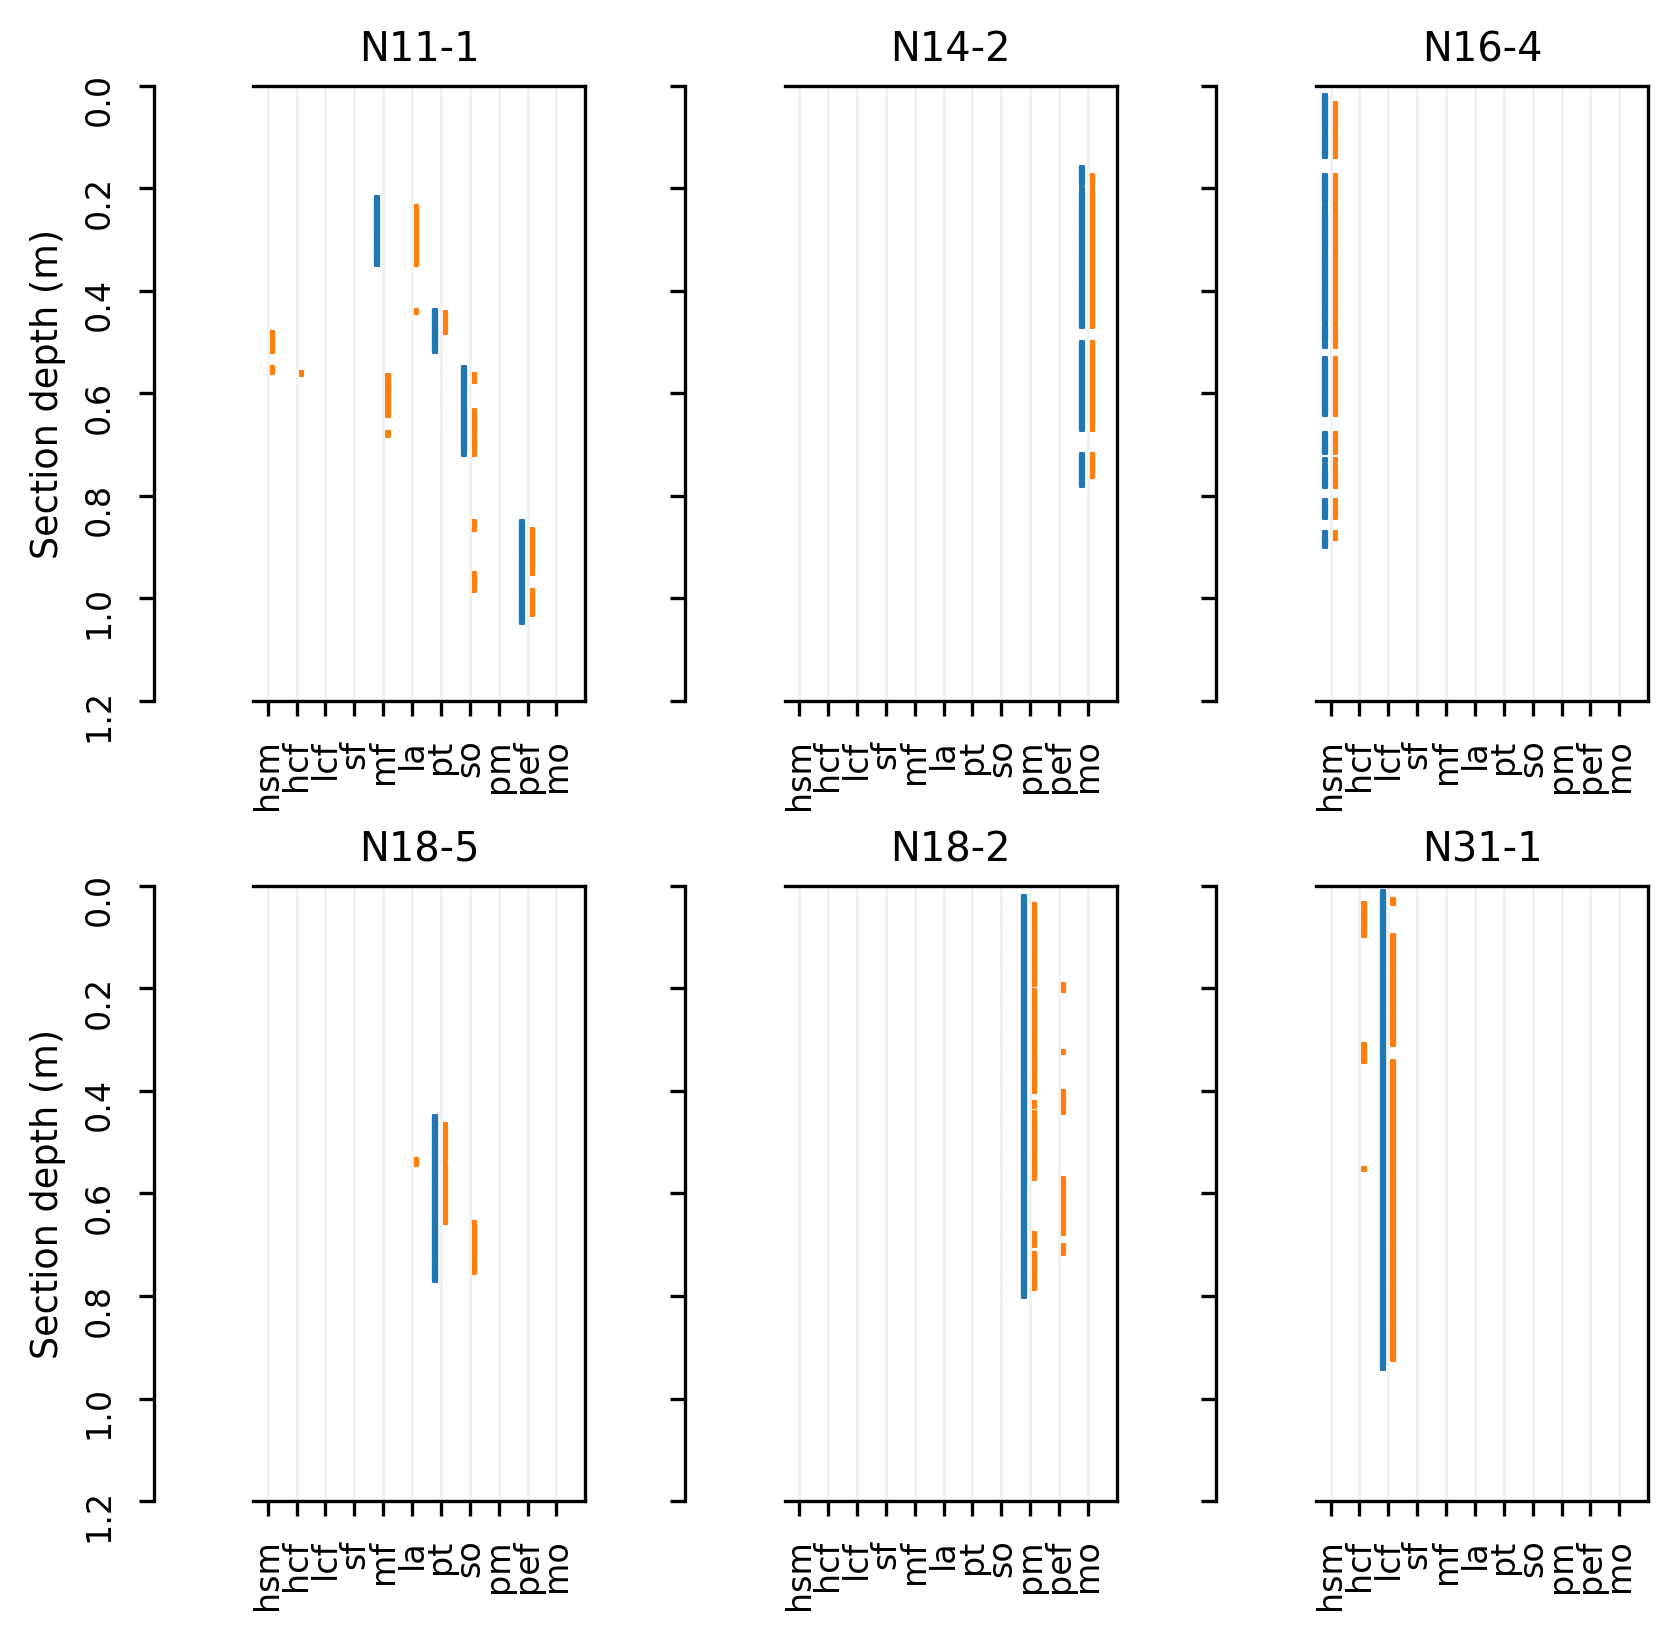

In [88]:
plot_facies(y_df, y_df.core_section.unique()[:6], 'y_roll', Facies, 'section_depth_mm', 1)

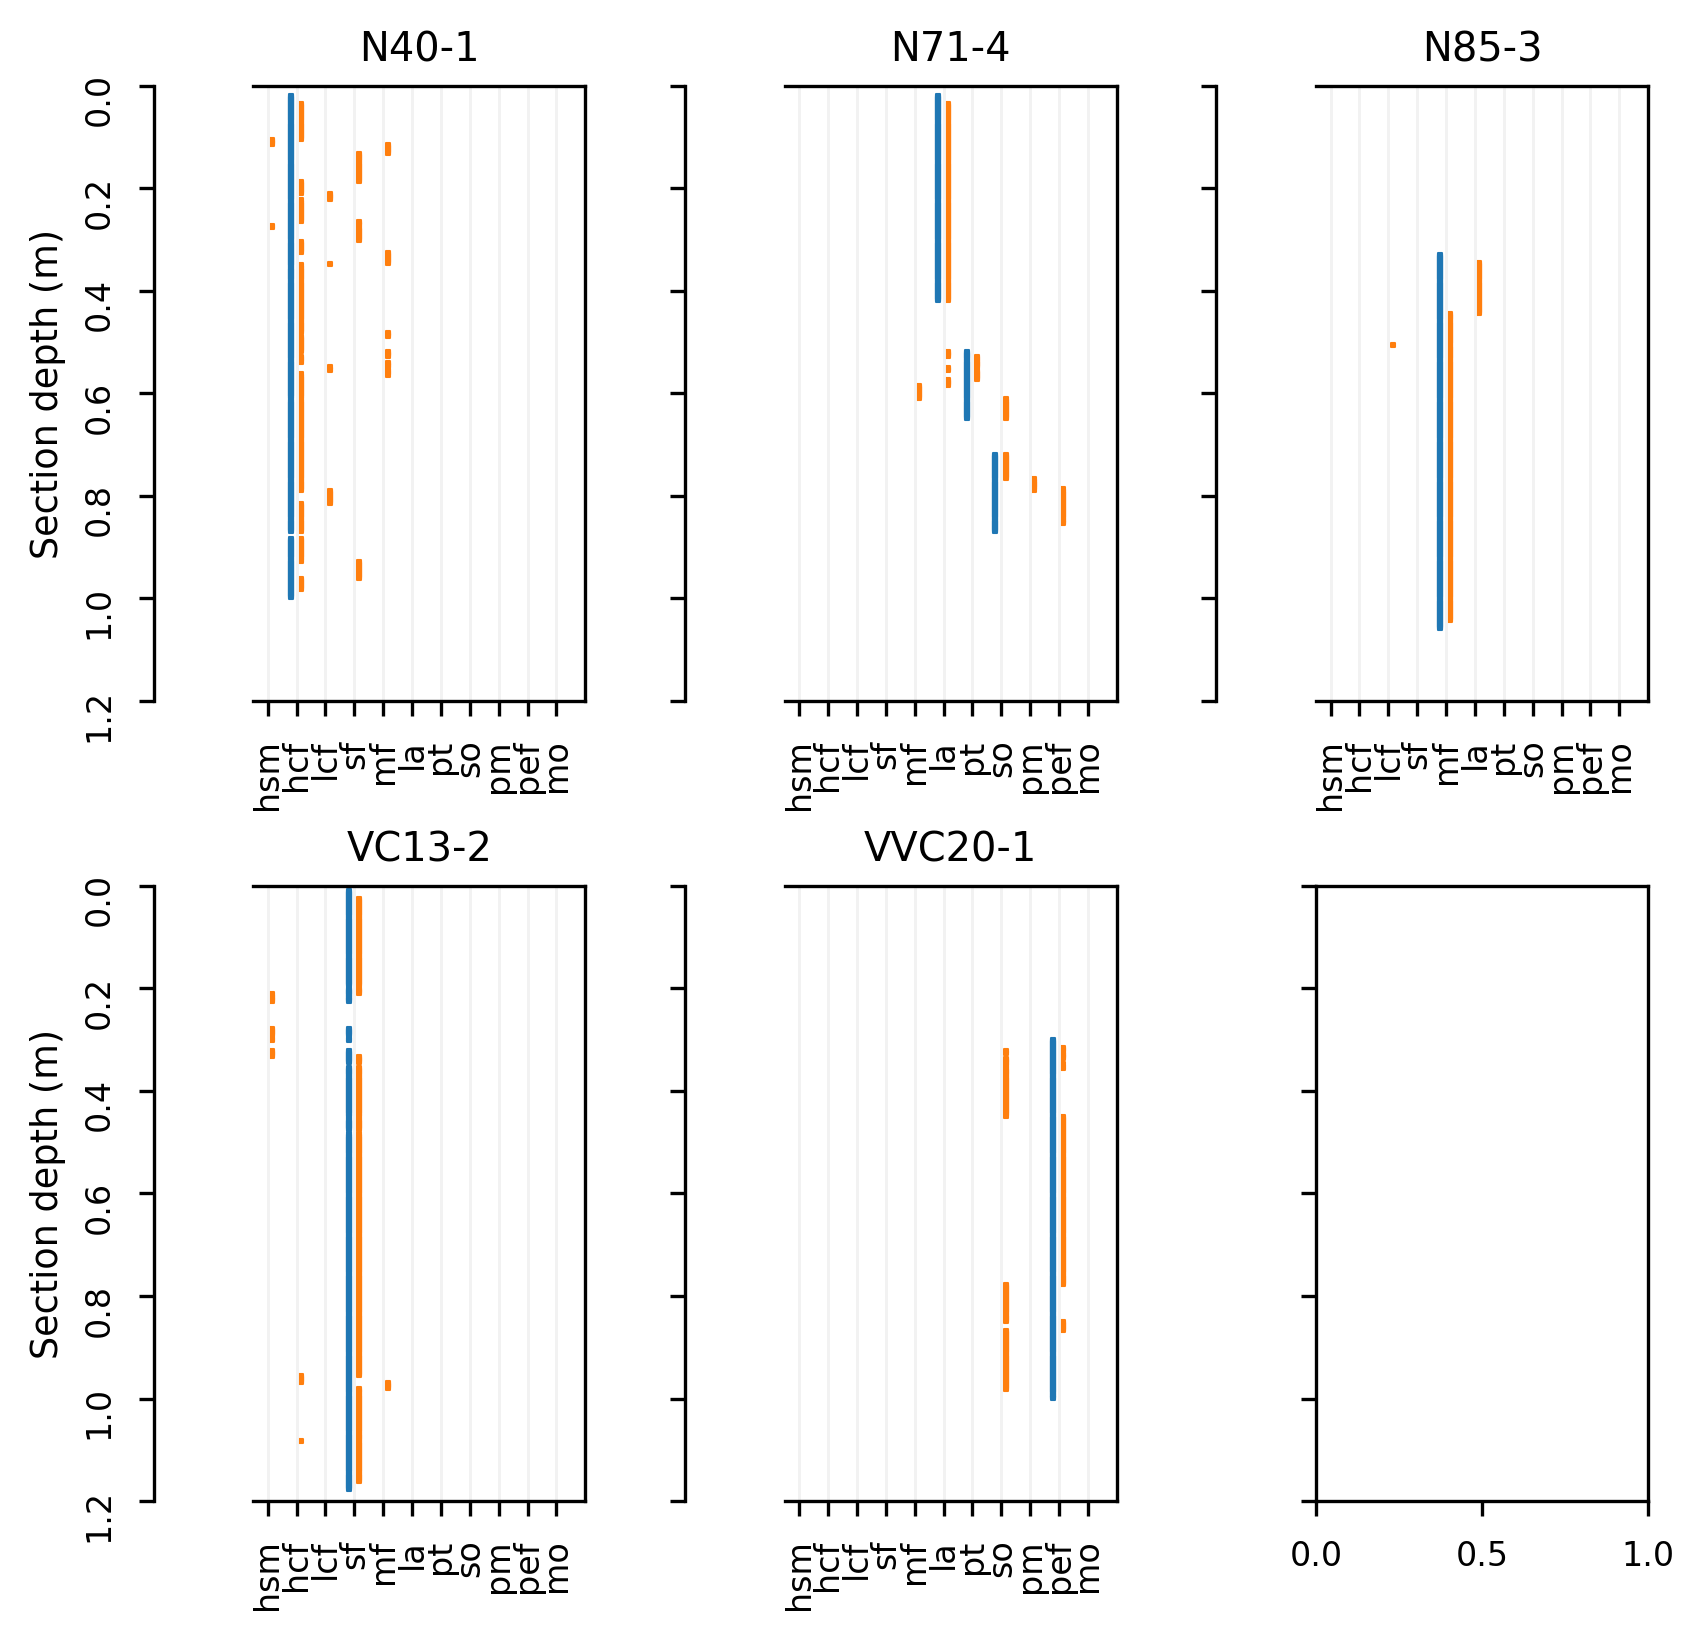

In [87]:
plot_facies(y_df, y_df.core_section.unique()[6:], 'y_roll', Facies, 'section_depth_mm', 2)

In [40]:
y_df.core_section.unique()

array(['N11-1', 'N14-2', 'N16-4', 'N18-5', 'N18-2', 'N31-1', 'N40-1',
       'N71-4', 'N85-3', 'VC13-2', 'VVC20-1'], dtype=object)

In [16]:
0.1/0.68

0.14705882352941177

In [7]:
mat_dic = eva.detect_conjuction(y_df, ['y', 'y_raw', 'y_roll', 'y_2d'], 11)

There are 5 boundaries in description.
There are 591 boundaries in the optimized raw model's predictions.
There are 98 boundaries in the optimized roll model's predictions.
There are 156 boundaries in the optimized 2d model's predictions.


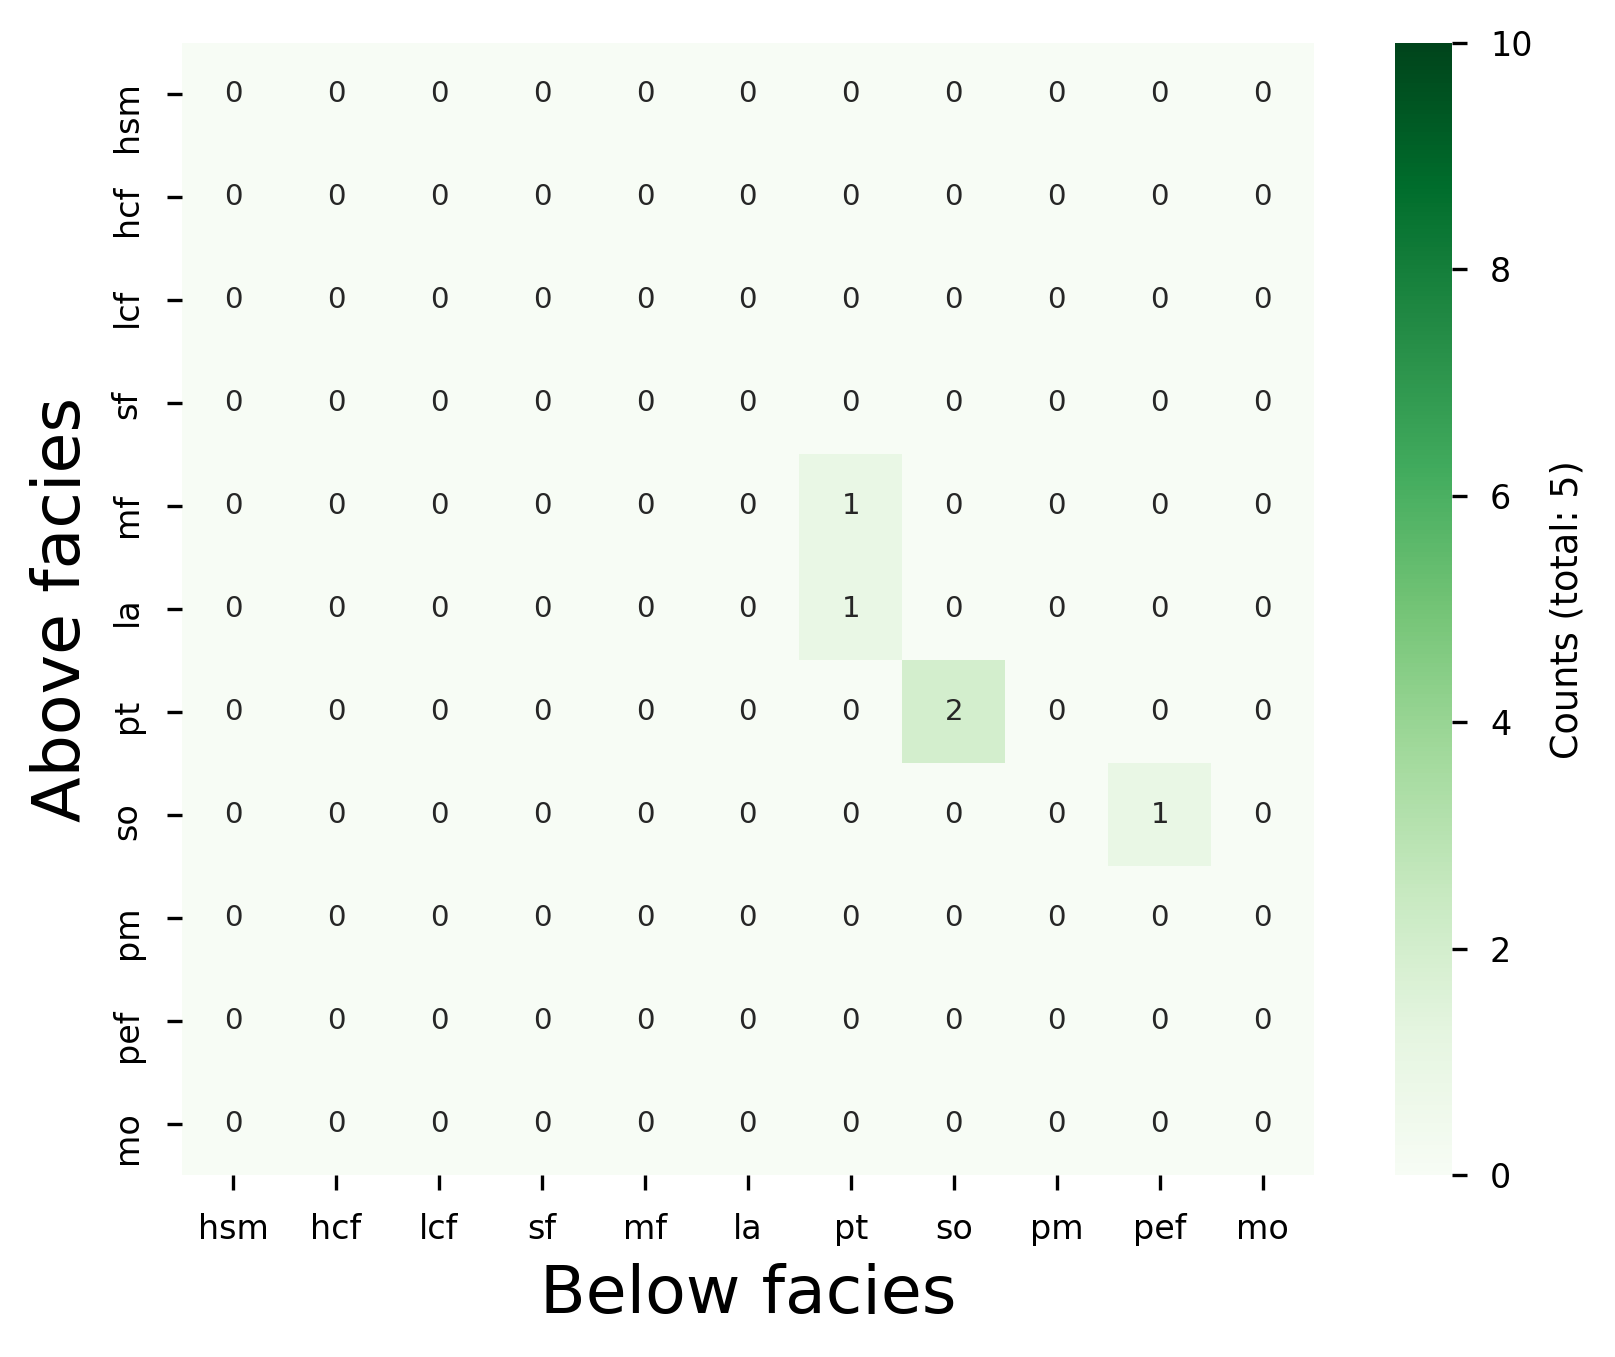

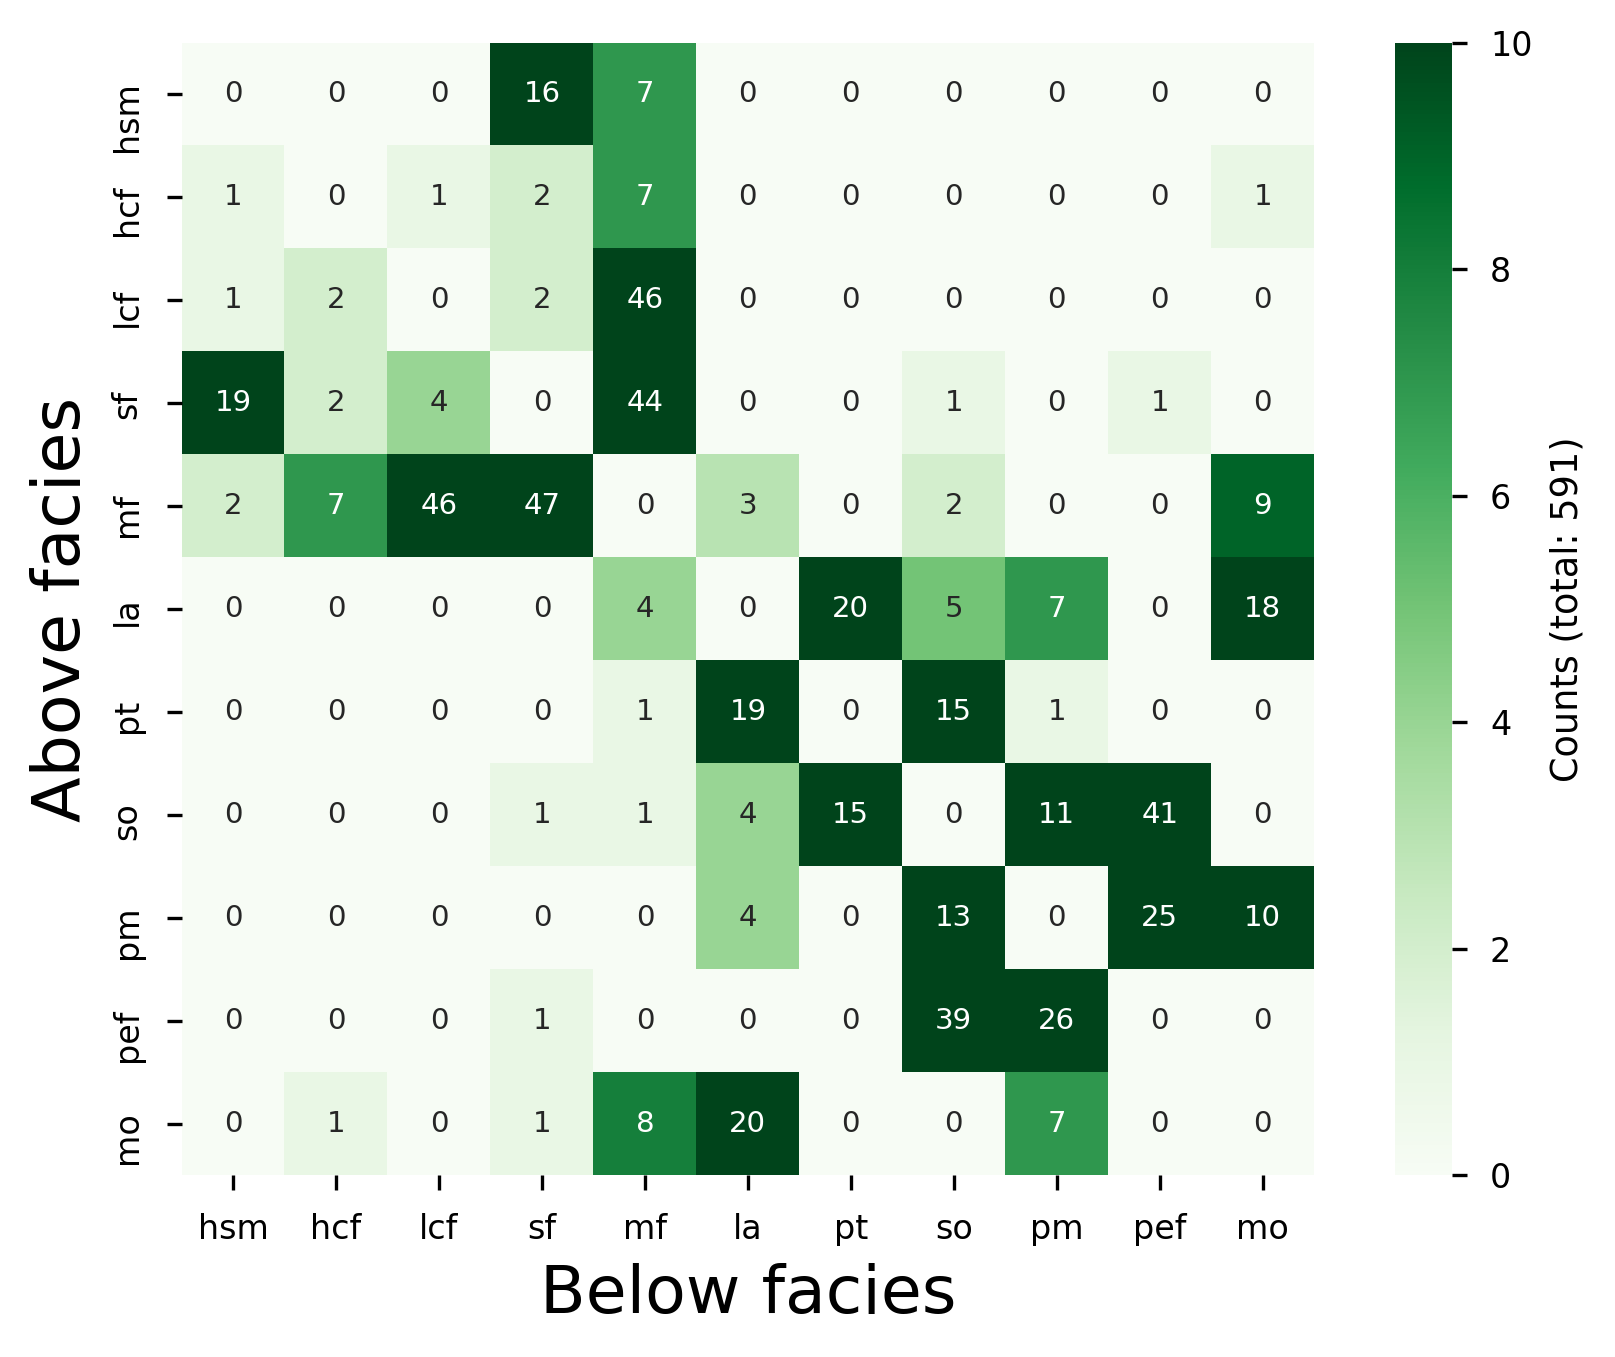

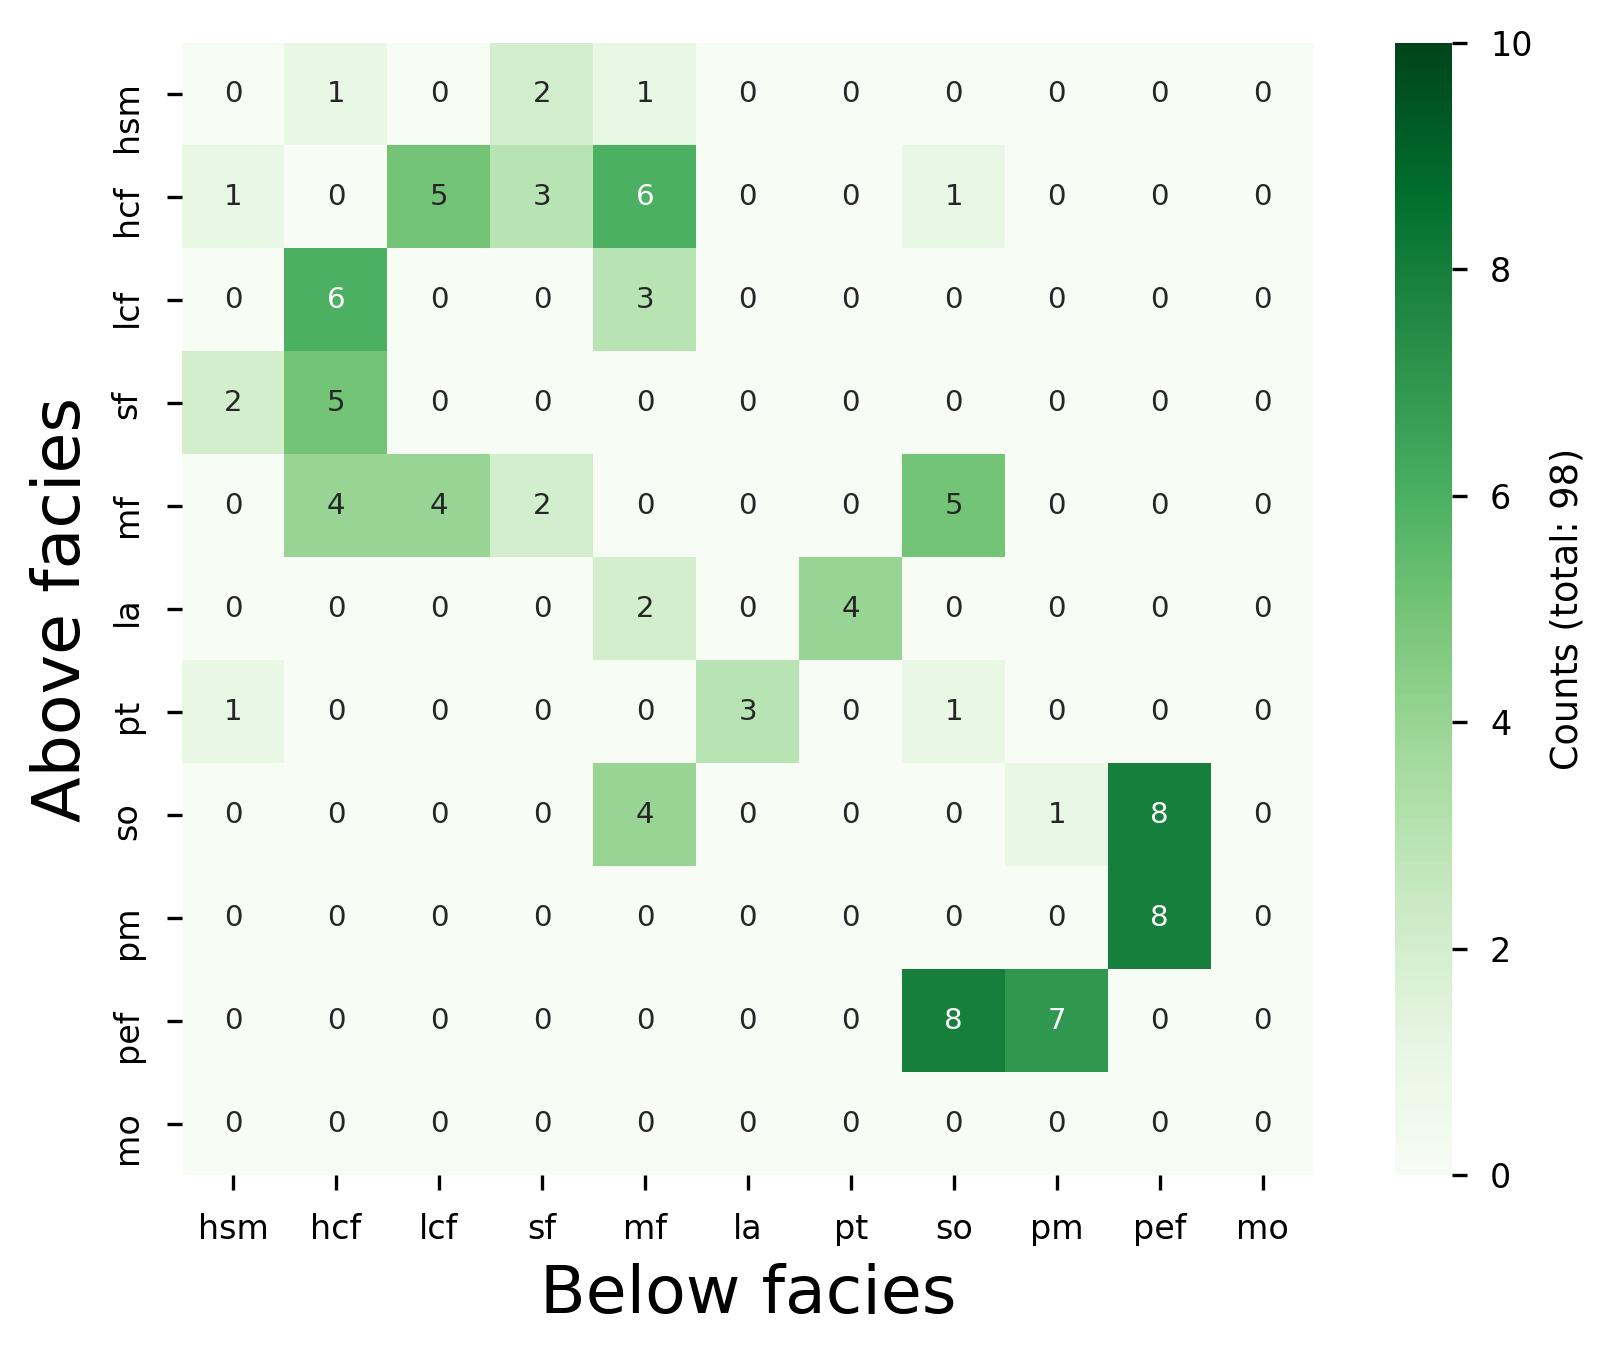

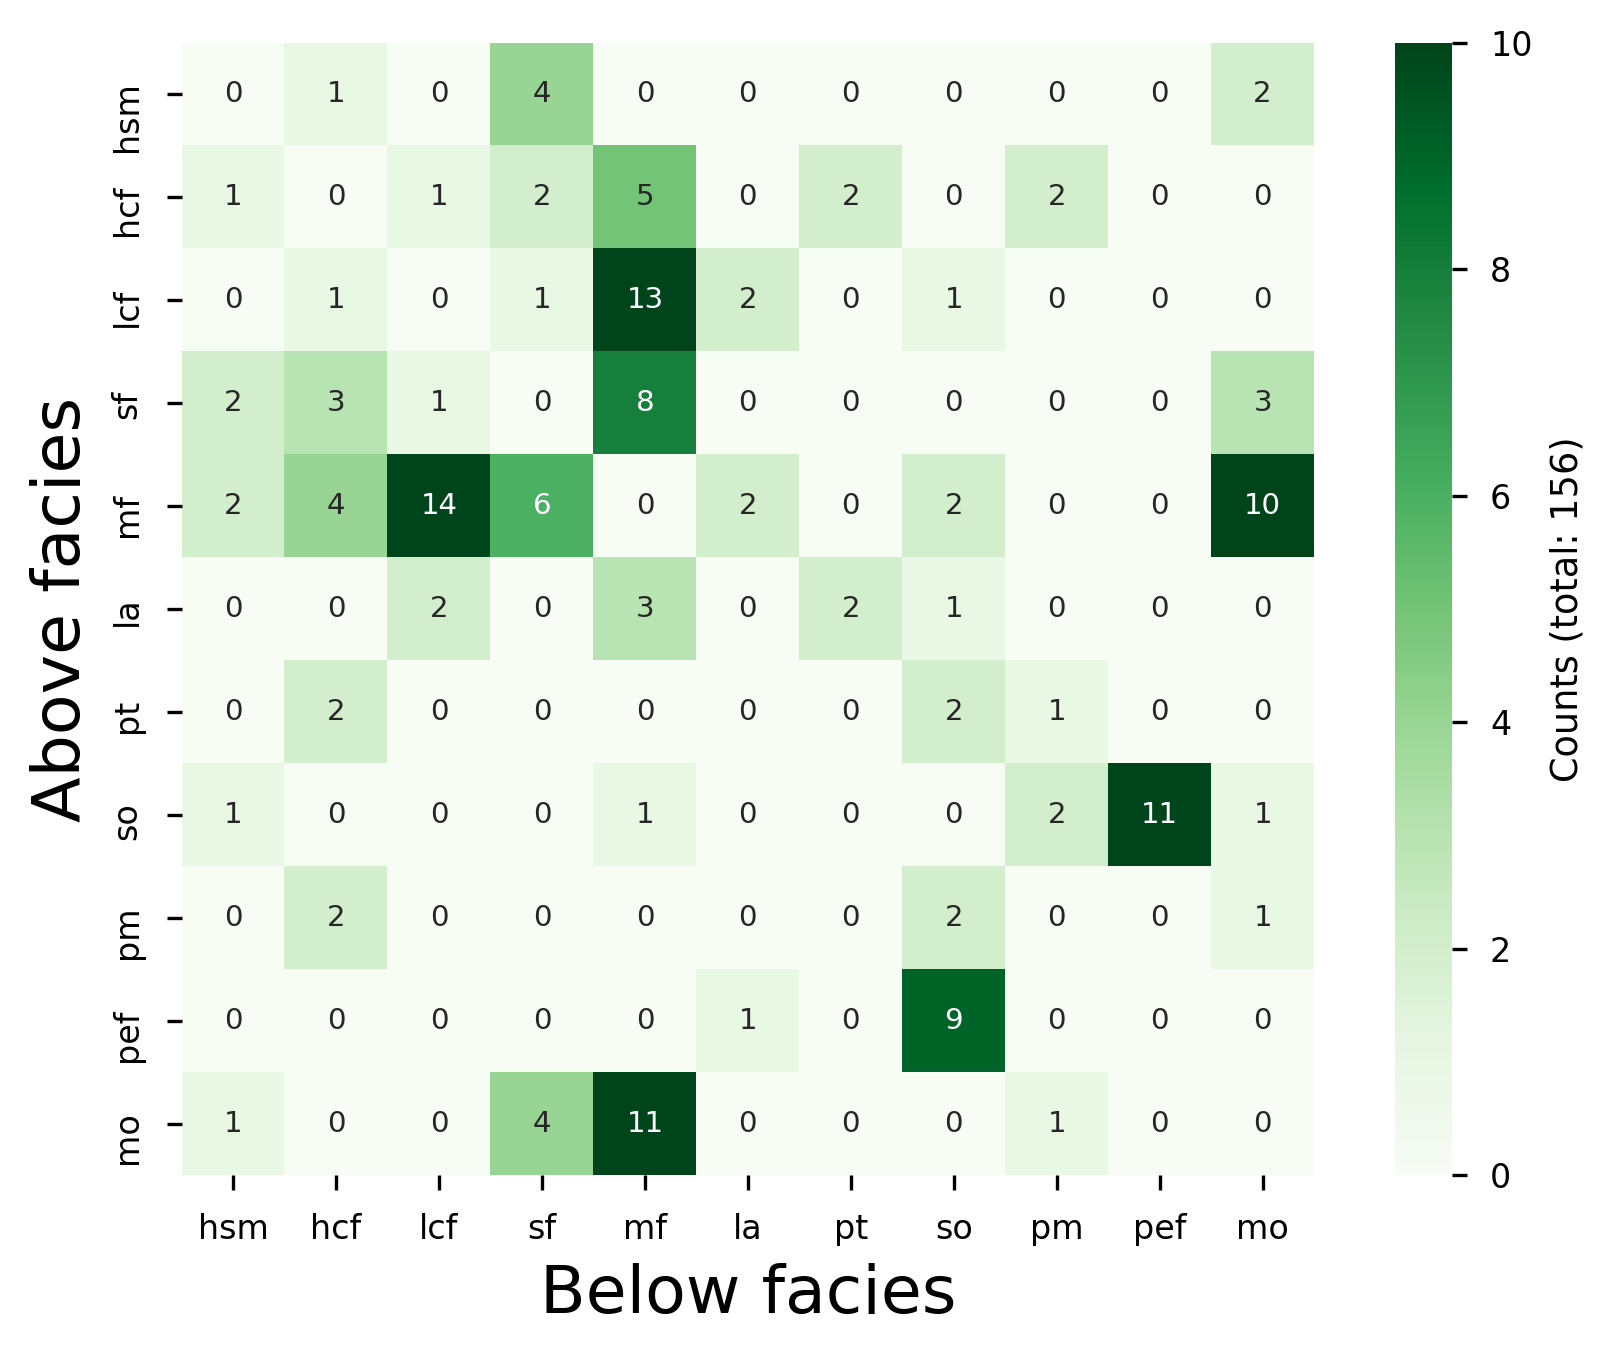

In [9]:
for key in mat_dic.keys():
    bd_mat = mat_dic[key]
    Facies = Facies
    split = 'test'
    
    fig, ax = plt.subplots(1, 1, figsize = (7, 5))
    sns.heatmap(
                bd_mat, annot=bd_mat.astype(str), ax=ax, cmap='Greens', square=True, 
                vmin=0, vmax=10, xticklabels=Facies, yticklabels=Facies, fmt='s', 
                annot_kws={'size': 7}, 
                cbar_kws={'label' : 'Counts (total: {})'.format(sum(sum(bd_mat)))}
               )
    ax.set_xlabel('Below facies', size = 16)
    ax.set_ylabel('Above facies', size = 16)
    fig.savefig('results/r_{}_{}_conjunction_matrix_{}.png'.format(split, key, date))

# Summary
Rolling is better than 2d and require less computation loading. Both of them are way better than the raw data.

# Confidence